In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('Churn data.csv')

In [5]:
df

CustomerID  Gender  SeniorCitizen Partner Dependents  Tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

# Data Understanding

In [6]:
df.shape

(7043, 21)

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.dtypes

CustomerID           object
Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
# Loop through each column and display unique values
for col in df.columns:
    print(f"\n--- {col} ---")
    print(df[col].unique())  # list of unique values
    print(f"Total unique values: {df[col].nunique()}")


--- CustomerID ---
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Total unique values: 7043

--- Gender ---
['Female' 'Male']
Total unique values: 2

--- SeniorCitizen ---
[0 1]
Total unique values: 2

--- Partner ---
['Yes' 'No']
Total unique values: 2

--- Dependents ---
['No' 'Yes']
Total unique values: 2

--- Tenure ---
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Total unique values: 73

--- PhoneService ---
['No' 'Yes']
Total unique values: 2

--- MultipleLines ---
['No phone service' 'No' 'Yes']
Total unique values: 3

--- InternetService ---
['DSL' 'Fiber optic' 'No']
Total unique values: 3

--- OnlineSecurity ---
['No' 'Yes' 'No internet service']
Total unique values: 3

--- OnlineBackup ---
['Yes' 'No' 'No internet service']
Total unique values: 3

--- DevicePro

In [11]:
df.isnull().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

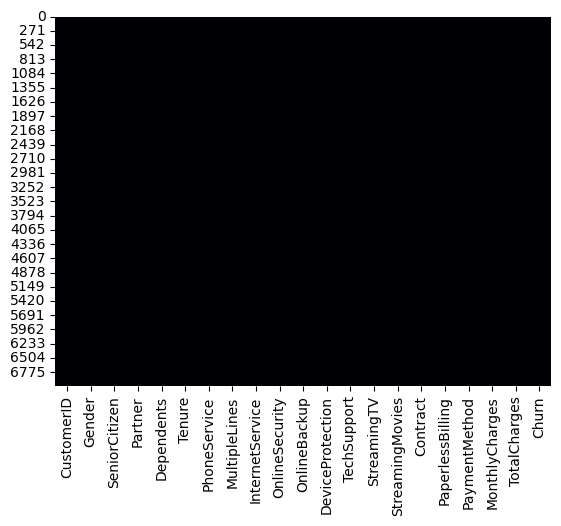

In [12]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False);

In [13]:
df.describe()

SeniorCitizen  Tenure  MonthlyCharges
count        7043.00 7043.00         7043.00
mean            0.16   32.37           64.76
std             0.37   24.56           30.09
min             0.00    0.00           18.25
25%             0.00    9.00           35.50
50%             0.00   29.00           70.35
75%             0.00   55.00           89.85
max             1.00   72.00          118.75

# DATA CLEANING

In [14]:
data=df.copy()
data

CustomerID  Gender  SeniorCitizen Partner Dependents  Tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [15]:
# Converting DataFrame column elements from string to float using the following code line :

l1 = [len(str(i).split()) for i in data['TotalCharges']]
l2 = [i for i in range(len(l1)) if l1[i] != 1]

print('Index Positions with empty spaces : ', *l2)

for i in l2:
    data.loc[i, 'TotalCharges'] = data.loc[i-1, 'TotalCharges']

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.drop(columns=['CustomerID'], inplace=True)

Index Positions with empty spaces :  488 753 936 1082 1340 3331 3826 4380 5218 6670 6754


In [16]:
# Encoding Categorical Features with LabelEncoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1= data.copy(deep = True)
text_data_features = [i for i in list(data.columns) if i not in list(data.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
Gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


In [17]:
df1.dtypes

Gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
Tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [18]:
df1

Gender  SeniorCitizen  Partner  Dependents  Tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0               0             2   
1                 0                0               2             0   
2                 0                0               2             2   
3                 1                0               2             0   
4                 0                1               0             0   
...             ...              ...             ...           ...   
7038              2                0               2             0   
7039              2                1               0             2   
7040              1                0               2             0   
7041              2                1               0             0   
7042              0                1               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                    1              2           29.85         29.85      0  
1                    0              3           56.95       1889.50      0  
2                    1              3           53.85        108.15      1  
3                    0              0           42.30       1840.75      0  
4                    1              2           70.70        151.65      1  
...                ...            ...             ...           ...    ...  
7038                 1              3           84.80       1990.50      0  
7039                 1              1          103.20       7362.90      0  
7040                 1              2           29.60        346.45      0  
7041                 1              3           74.40        306.60      1  
7042                 1              0          105.65       6844.50      0  

[7043 rows x 20 columns]

In [19]:
df1.isna().sum()

Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
df1.describe()

Gender  SeniorCitizen  Partner  Dependents  Tenure  PhoneService  \
count 7043.00        7043.00  7043.00     7043.00 7043.00       7043.00   
mean     0.50           0.16     0.48        0.30   32.37          0.90   
std      0.50           0.37     0.50        0.46   24.56          0.30   
min      0.00           0.00     0.00        0.00    0.00          0.00   
25%      0.00           0.00     0.00        0.00    9.00          1.00   
50%      1.00           0.00     0.00        0.00   29.00          1.00   
75%      1.00           0.00     1.00        1.00   55.00          1.00   
max      1.00           1.00     1.00        1.00   72.00          1.00   

       MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
count        7043.00          7043.00         7043.00       7043.00   
mean            0.94             0.87            0.79          0.91   
std             0.95             0.74            0.86          0.88   
min             0.00             0.00            0.00          0.00   
25%             0.00             0.00            0.00          0.00   
50%             1.00             1.00            1.00          1.00   
75%             2.00             1.00            2.00          2.00   
max             2.00             2.00            2.00          2.00   

       DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
count           7043.00      7043.00      7043.00          7043.00   7043.00   
mean               0.90         0.80         0.99             0.99      0.69   
std                0.88         0.86         0.89             0.89      0.83   
min                0.00         0.00         0.00             0.00      0.00   
25%                0.00         0.00         0.00             0.00      0.00   
50%                1.00         1.00         1.00             1.00      0.00   
75%                2.00         2.00         2.00             2.00      1.00   
max                2.00         2.00         2.00             2.00      2.00   

       PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges   Churn  
count           7043.00        7043.00         7043.00       7043.00 7043.00  
mean               0.59           1.57           64.76       2285.17    0.27  
std                0.49           1.07           30.09       2267.54    0.44  
min                0.00           0.00           18.25         18.80    0.00  
25%                0.00           1.00           35.50        401.68    0.00  
50%                1.00           2.00           70.35       1398.25    0.00  
75%                1.00           2.00           89.85       3803.05    1.00  
max                1.00           3.00          118.75       8684.80    1.00

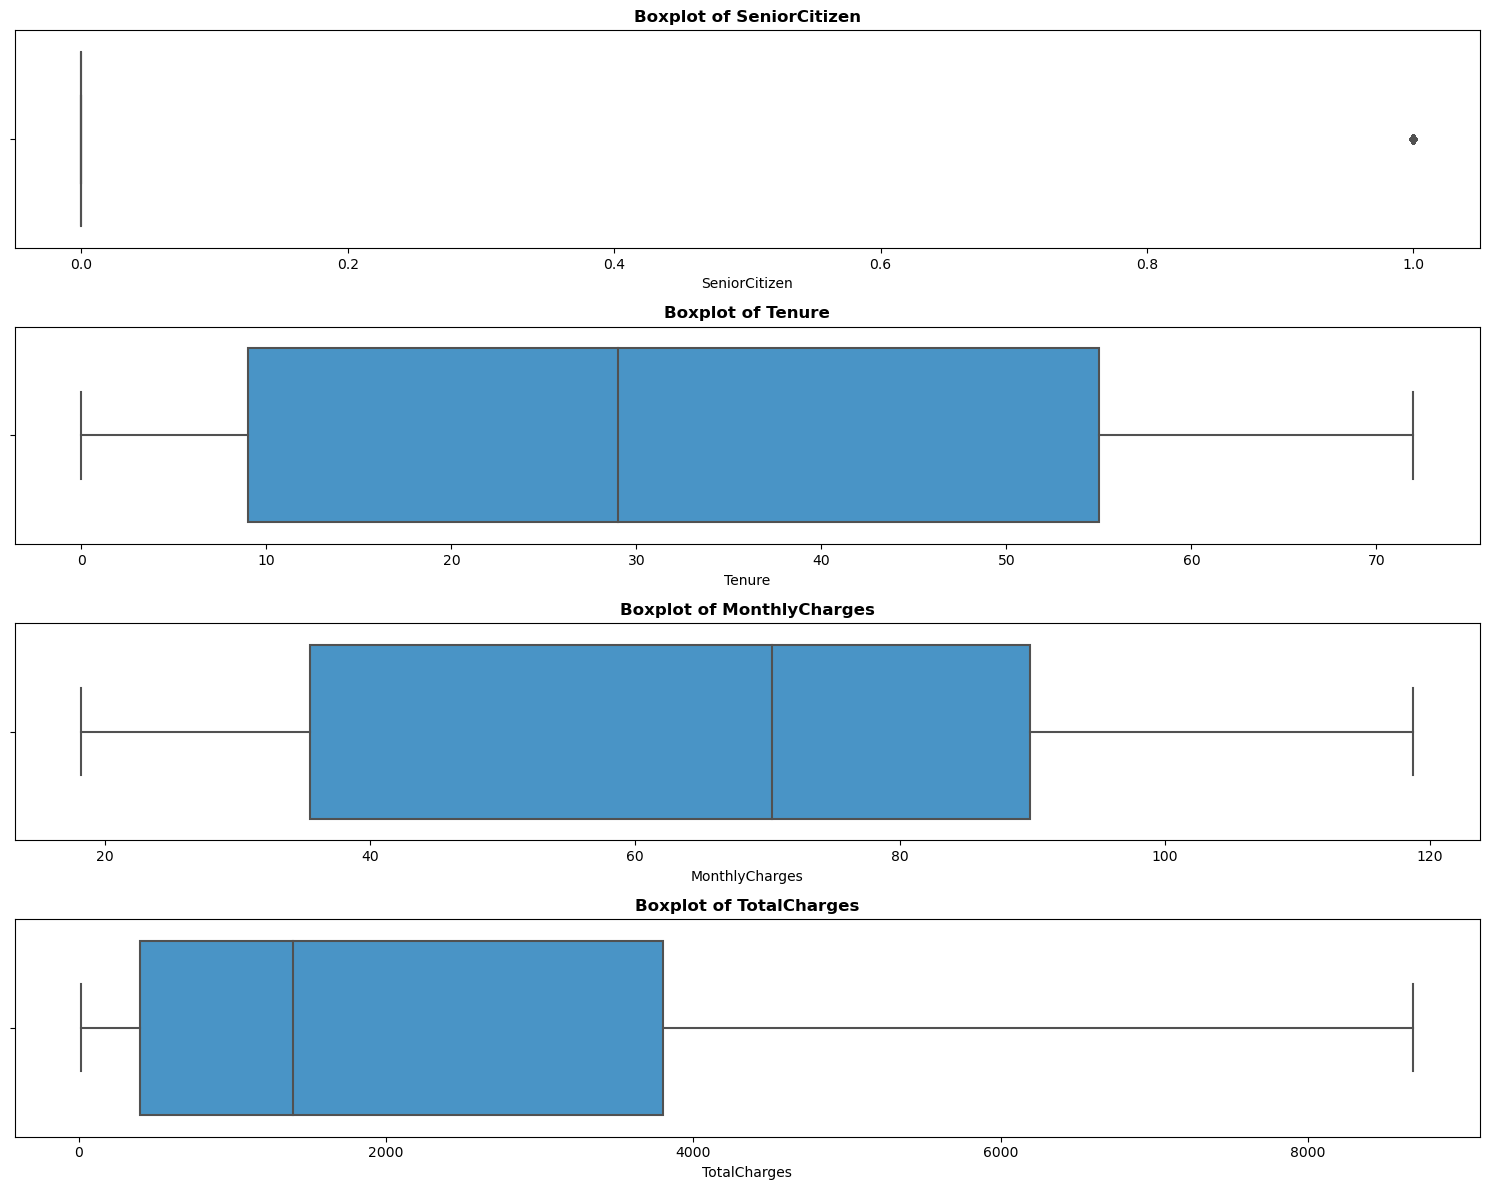

In [21]:
# Checking for outliers

# Select only numerical columns
num_cols = df1.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, len(num_cols)*3))  # adjust height dynamically

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(x=df1[col], color='#3498db')  # sharp blue for clarity
    plt.title(f'Boxplot of {col}', fontsize=12, fontweight='bold')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [22]:
def detect_outliers_iqr(df1, cols):
    outlier_summary = {}
    for col in cols:
        Q1 = df1[col].quantile(0.25)
        Q3 = df1[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)][col]
        
        outlier_summary[col] = {
            "Total Values": df1[col].shape[0],
            "Outlier Count": outliers.shape[0],
            "Outlier %": round((outliers.shape[0] / df[col].shape[0]) * 100, 2),
            "Lower Bound": lower_bound,
            "Upper Bound": upper_bound
        }
    return pd.DataFrame(outlier_summary).T


# Example usage (numerical columns in your dataset)
numerical_cols = ['Tenure','MonthlyCharges','TotalCharges']
outlier_report = detect_outliers_iqr(df1, numerical_cols)
outlier_report

Total Values  Outlier Count  Outlier %  Lower Bound  \
Tenure               7043.00           0.00       0.00       -60.00   
MonthlyCharges       7043.00           0.00       0.00       -46.02   
TotalCharges         7043.00           0.00       0.00     -4700.39   

                Upper Bound  
Tenure               124.00  
MonthlyCharges       171.38  
TotalCharges        8905.11

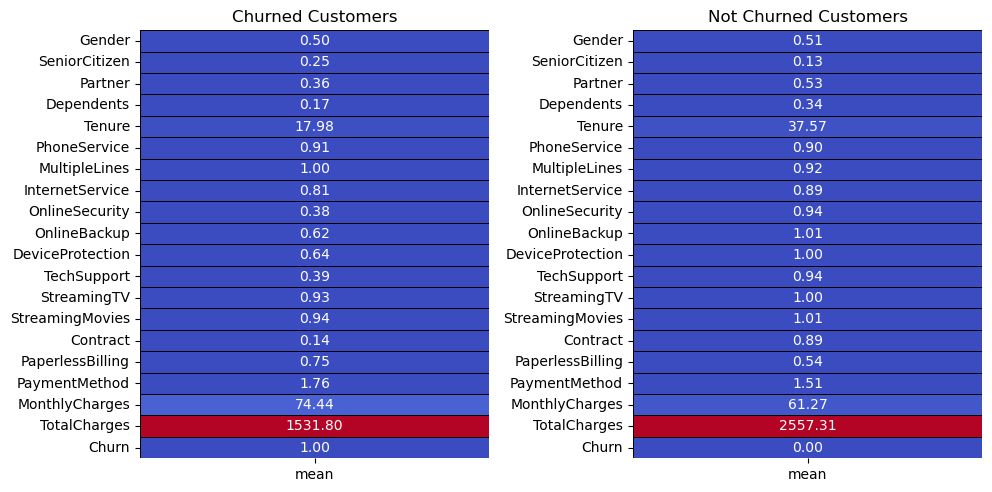

In [23]:
#Heatmap of Feature Averages: Churned vs. Non-Churned Customers

colors = "coolwarm"   # or "YlGnBu", "magma", "viridis", etc.

churn = df1[df1['Churn'] == 1].describe().T
not_churn = df1[df1['Churn'] == 0].describe().T

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(churn[['mean']], annot=True, cmap=colors, 
            linewidths=0.4, linecolor='black', 
            cbar=False, fmt='.2f')
plt.title('Churned Customers')

plt.subplot(1, 2, 2)
sns.heatmap(not_churn[['mean']], annot=True, cmap=colors, 
            linewidths=0.4, linecolor='black', 
            cbar=False, fmt='.2f')
plt.title('Not Churned Customers')

fig.tight_layout(pad=1)
plt.show()

# Exploratory Data Analysis

In [24]:
col = list(df1.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features : Tenure MonthlyCharges TotalCharges


                # Target Variable Visualization (Churn)

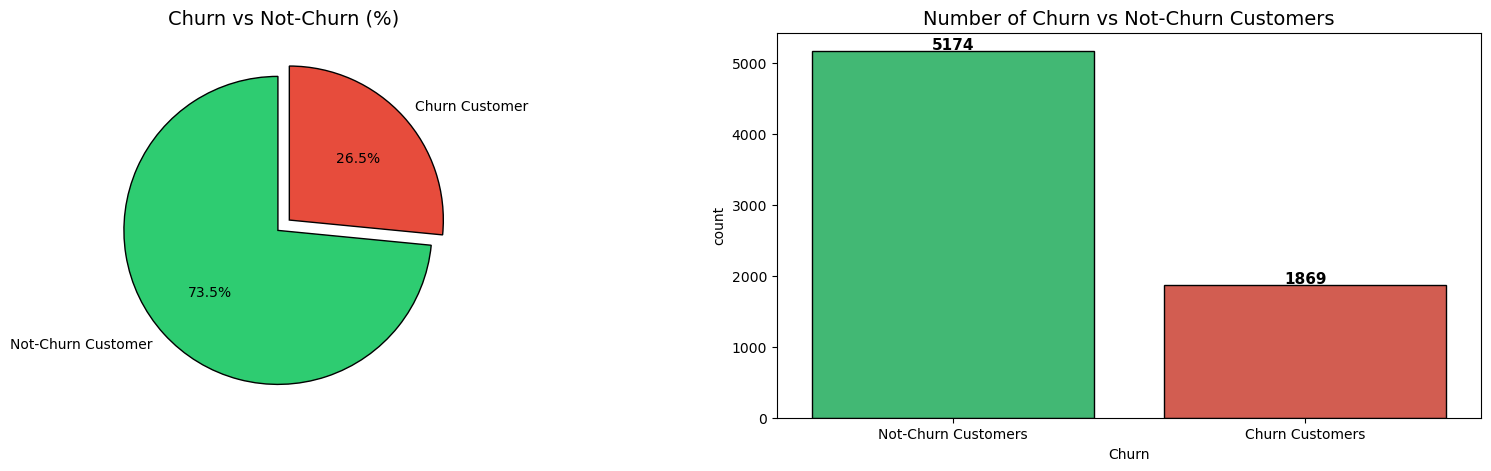

In [25]:
# Churn Distribution: Customers Who Stayed vs. Left

colors = ['#2ecc71', '#e74c3c']   # green for retained, red for churned

l = list(df1['Churn'].value_counts())
circle = [l[0] / sum(l) * 100, l[1] / sum(l) * 100]

fig = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Pie Chart
plt.subplot(1, 2, 1)
plt.pie(circle, 
        labels=['Not-Churn Customer', 'Churn Customer'], 
        autopct='%1.1f%%', startangle=90, 
        explode=(0.05, 0.05), 
        colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Churn vs Not-Churn (%)', fontsize=14)

# Countplot
plt.subplot(1, 2, 2)
ax = sns.countplot(x='Churn', data=df1, palette=colors, edgecolor='black')

# Add counts on top of bars
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, 
            rect.get_height() + 20, 
            rect.get_height(), 
            ha='center', fontsize=11, fontweight='bold')

ax.set_xticklabels(['Not-Churn Customers', 'Churn Customers'])
plt.title('Number of Churn vs Not-Churn Customers', fontsize=14)

plt.show()

In [26]:
# Remove churn from categories

categorical_features.remove('Churn')

In [27]:
# Feature Grouping: Customer Information, Services, and Payment
l1 = ['Gender','SeniorCitizen','Partner','Dependents']  # Customer Information
l2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport']  # Services
l3 = ['Contract','PaperlessBilling','PaymentMethod']  # Payment Information

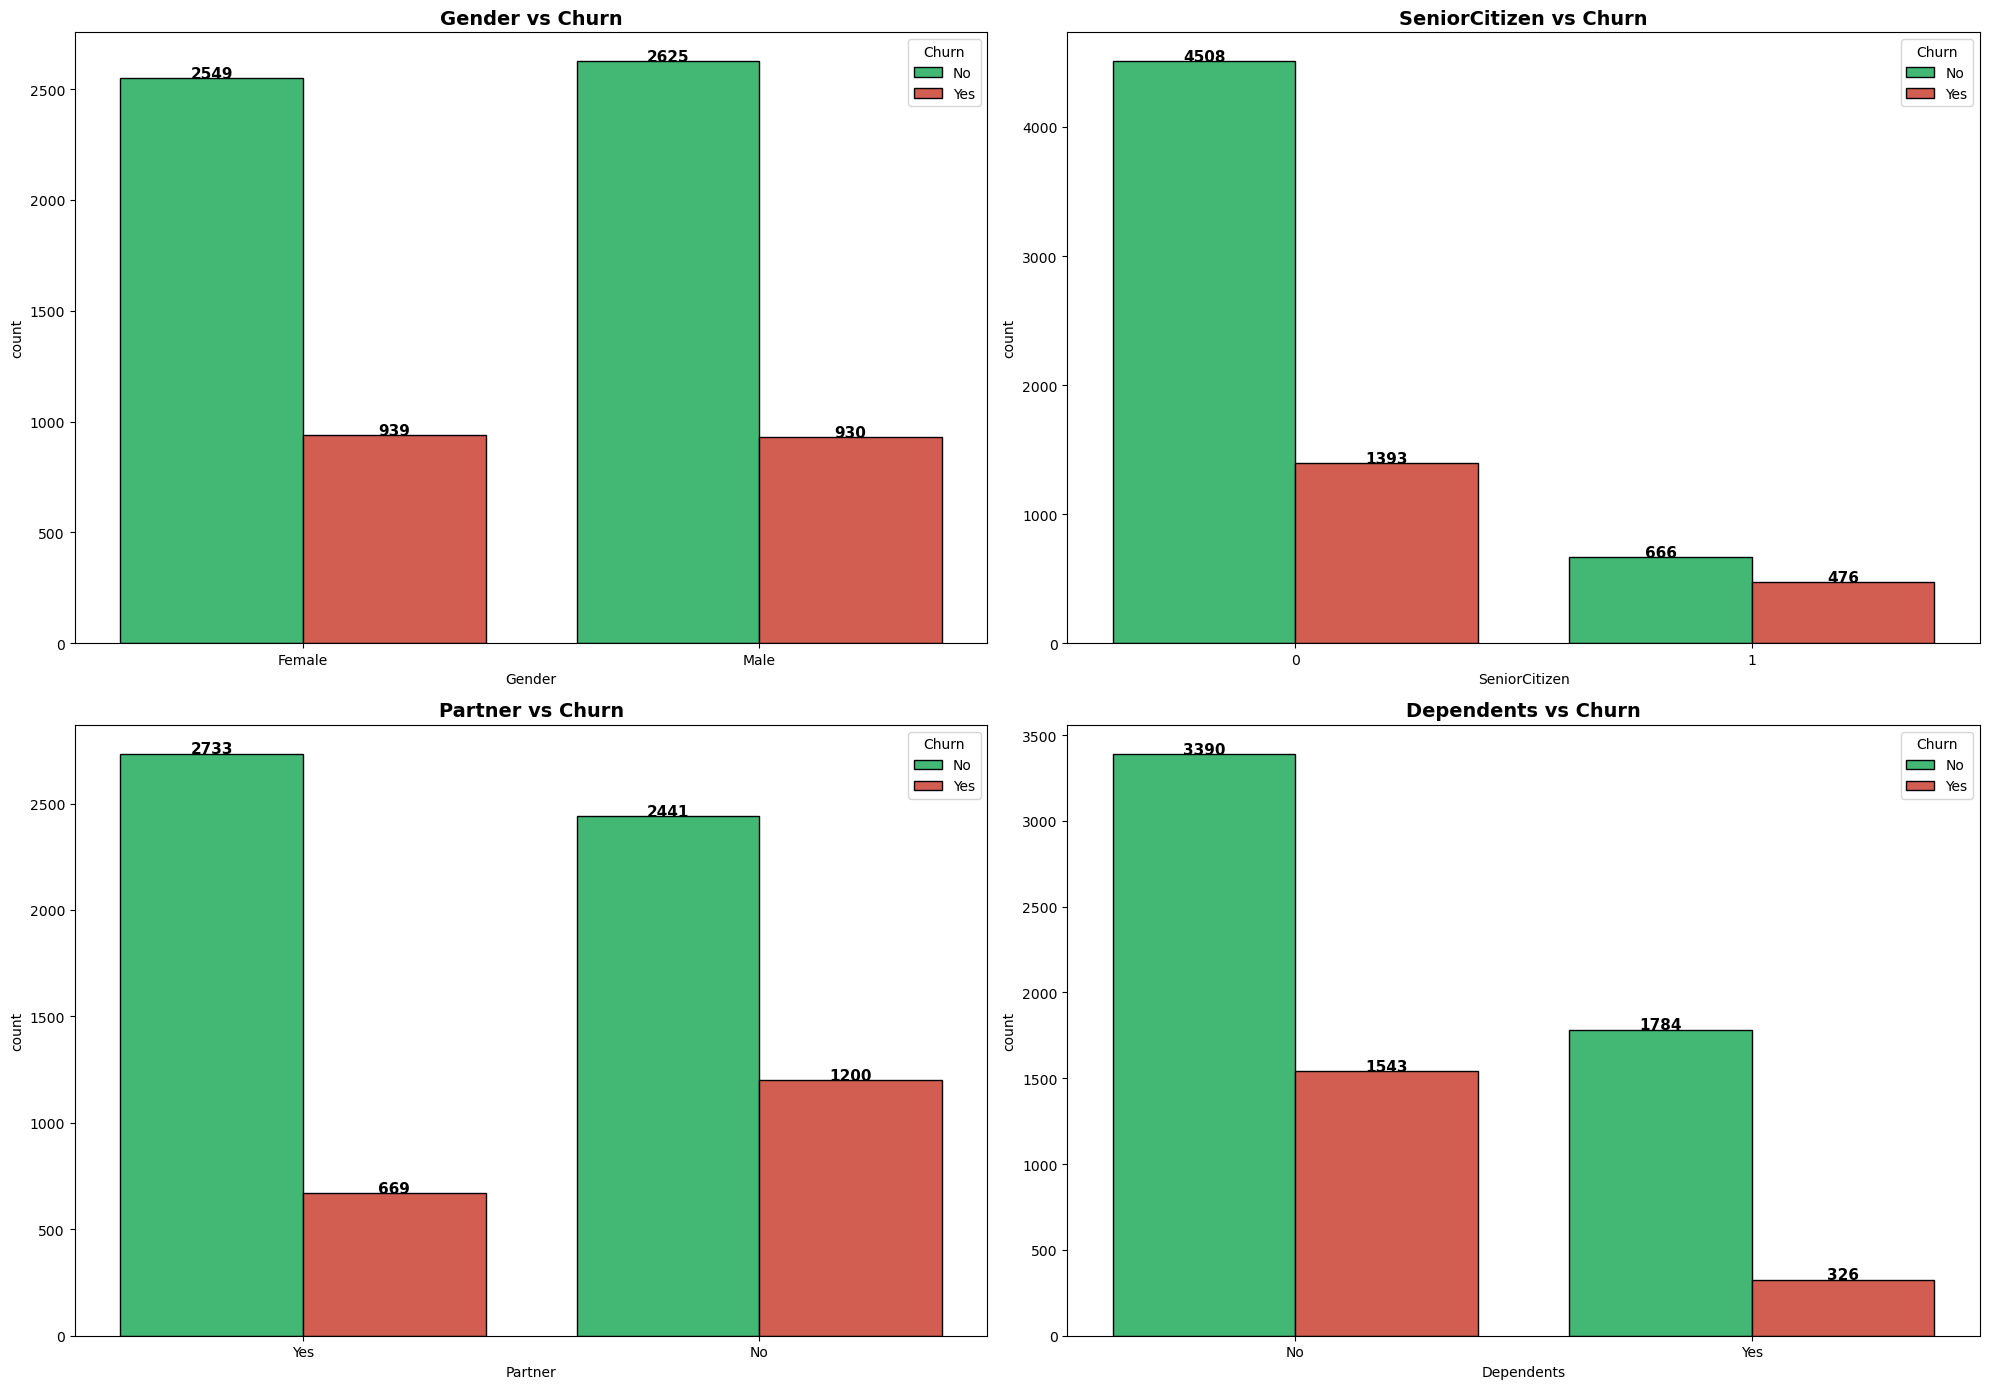

In [28]:
# Countplots of customer information features (Gender, SeniorCitizen, Partner, Dependents) against churn.

colors = ['#2ecc71', '#e74c3c']

fig = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))

for i in range(len(l1)):
    plt.subplot(2, 2, i+1)
    ax = sns.countplot(x=l1[i], data=data, hue="Churn", palette=colors, edgecolor='black')

    # Add counts on bars
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2,
                rect.get_height() + 2,
                rect.get_height(),
                ha='center', fontsize=11, fontweight='bold')

    # Dynamic title
    title = l1[i] + ' vs Churn'
    plt.title(title, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

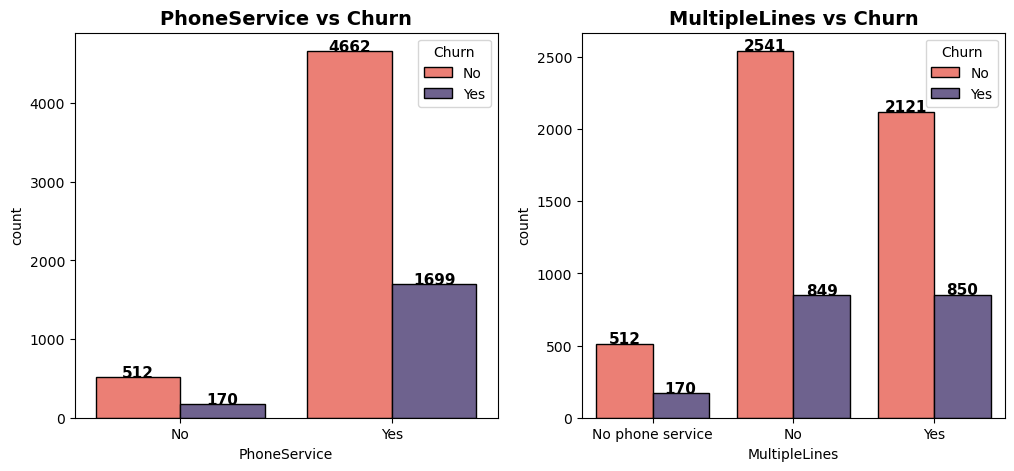

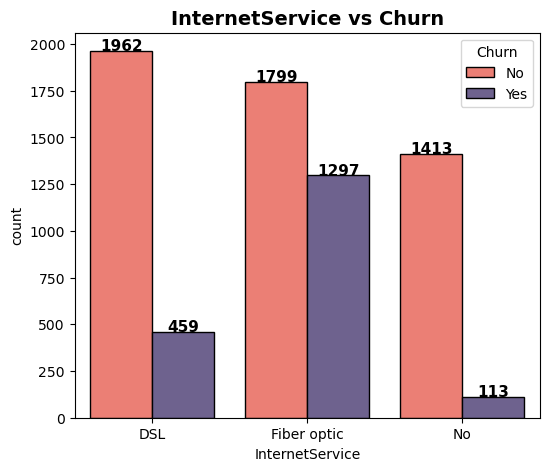

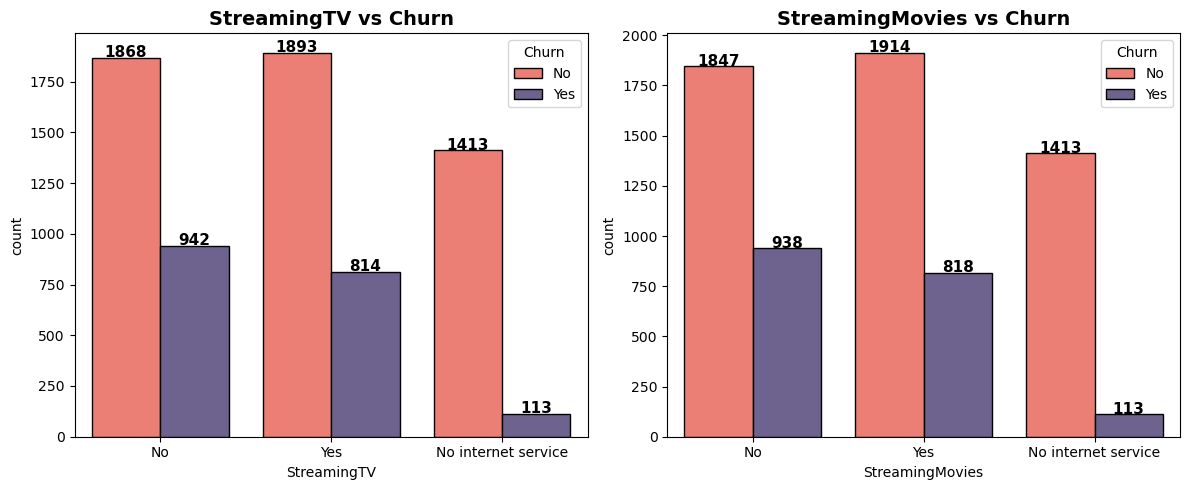

In [29]:
# Plotting service-related features (PhoneService, MultipleLines, InternetService, StreamingTV, etc.) against churn

colors = ['#FF6F61', '#6B5B95']   # Coral Red & Royal Purple

fig = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i+1)
    ax = sns.countplot(x=l2[i], data=data, hue="Churn", palette=colors, edgecolor='black')
    
    # Add counts
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2,
                rect.get_height() + 2,
                rect.get_height(),
                ha='center', fontsize=11, fontweight='bold')
    plt.title(l2[i] + ' vs Churn', fontsize=14, fontweight='bold')

# Single Plot
fig = plt.subplots(nrows=1, ncols=1, figsize=(6,5))
plt.subplot(1,1,1)
ax = sns.countplot(x=l2[2], data=data, hue="Churn", palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2,
            rect.get_height() + 2,
            rect.get_height(),
            ha='center', fontsize=11, fontweight='bold')
plt.title(l2[2] + ' vs Churn', fontsize=14, fontweight='bold')

# Next Two Plots
fig = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
for i in range(len(l2[3:5])):
    plt.subplot(1,2,i+1)
    ax = sns.countplot(x=l2[i+3], data=data, hue="Churn", palette=colors, edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2,
                rect.get_height() + 2,
                rect.get_height(),
                ha='center', fontsize=11, fontweight='bold')
    plt.title(l2[i+3] + ' vs Churn', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

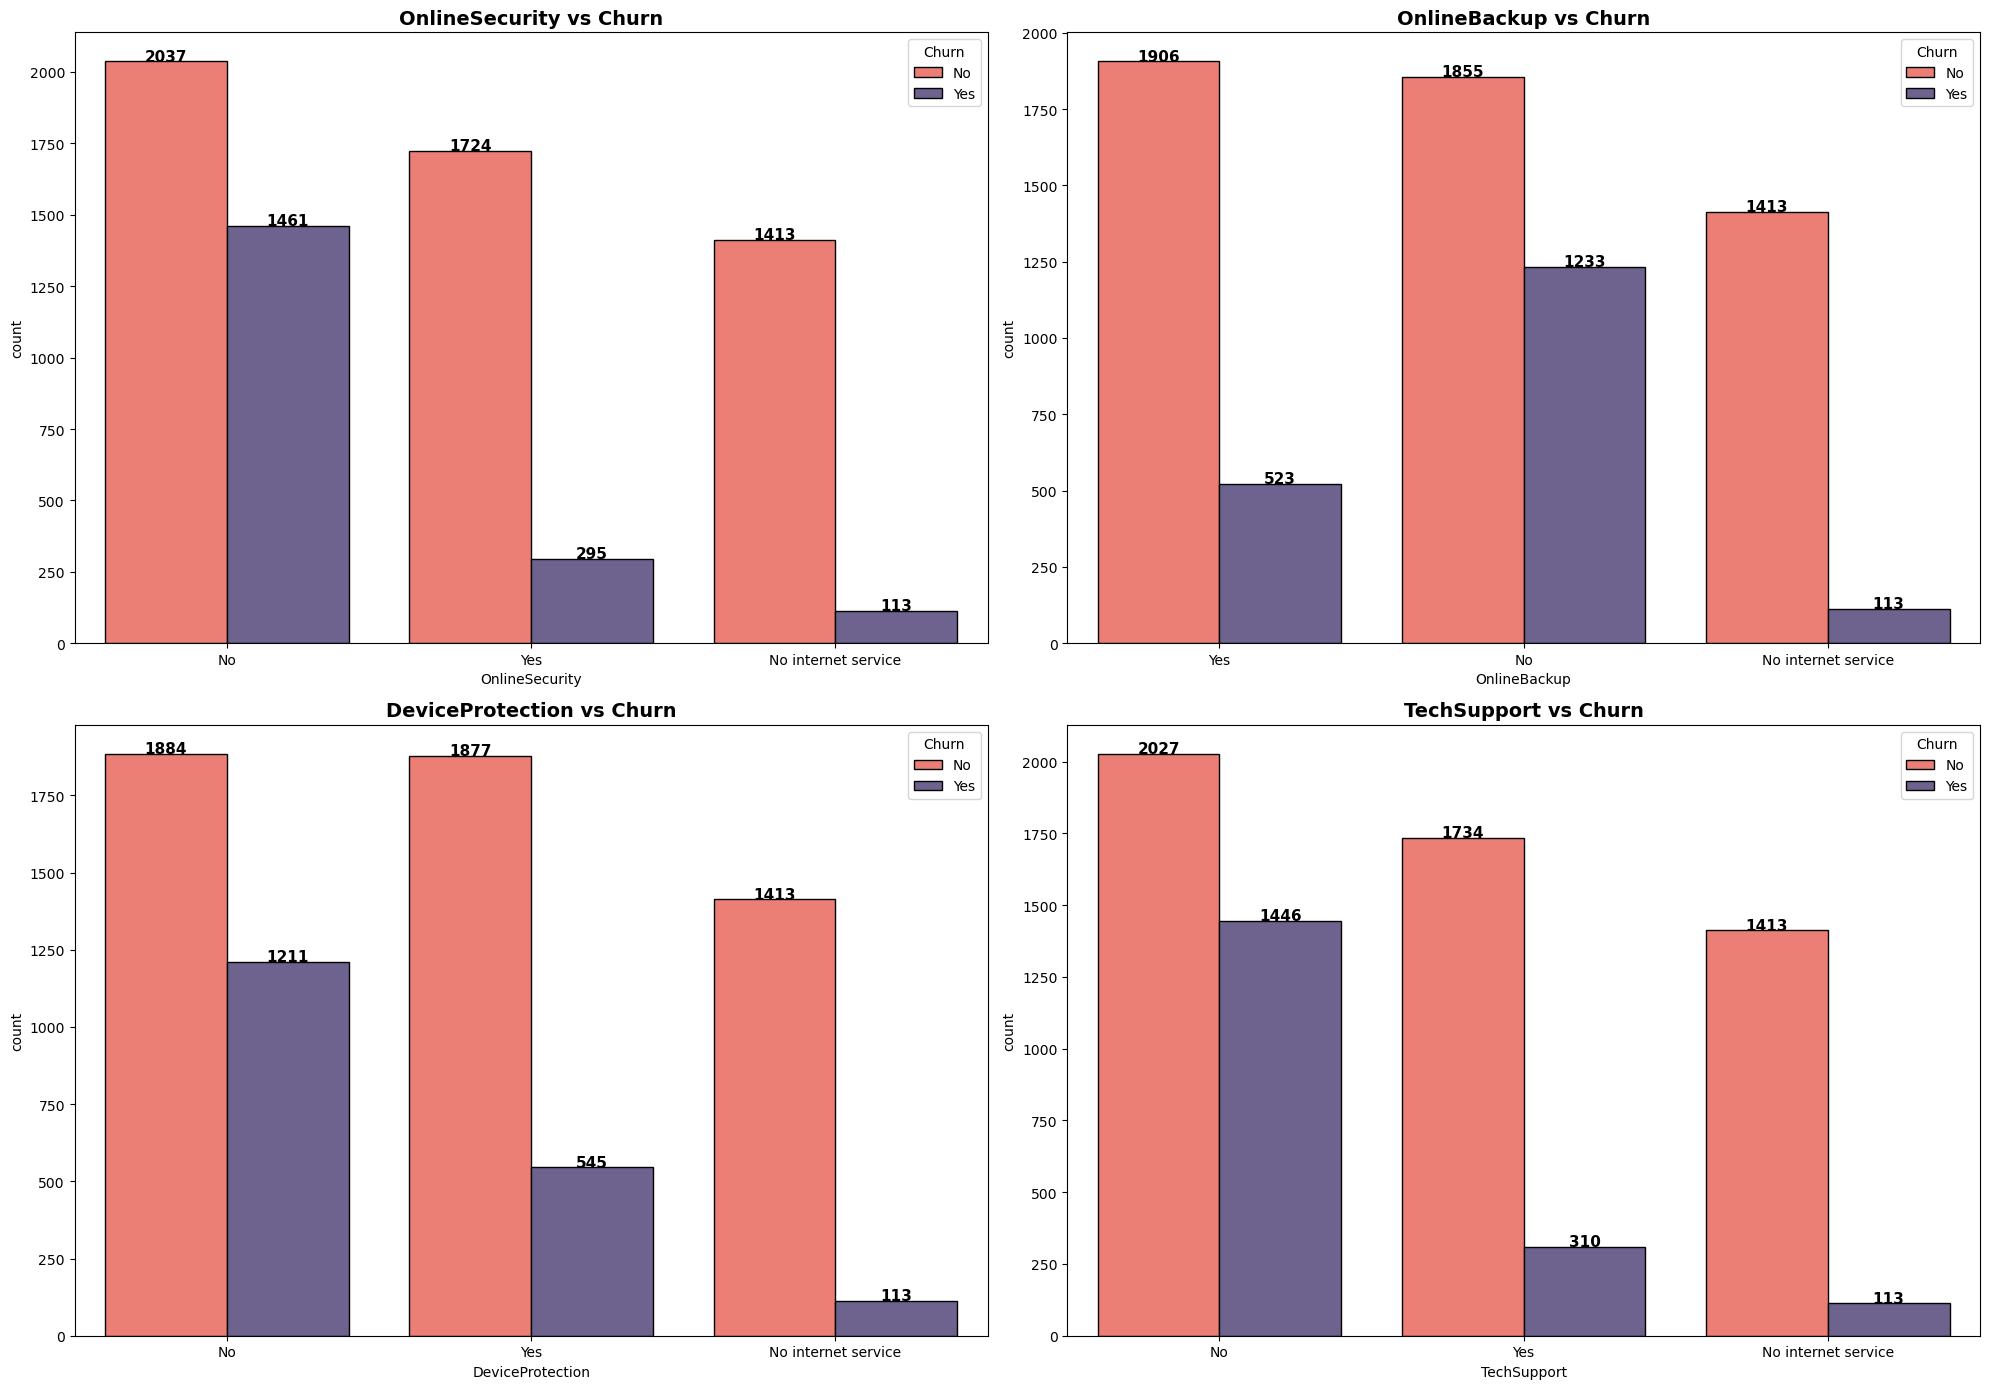

In [30]:
# visualizing service-related features against churn, focusing on the last four features from l2 (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport).

colors = ['#FF6F61', '#6B5B95']  # Coral Red & Royal Purple

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))

for i, col in enumerate(l2[-4:]):
    plt.subplot(2, 2, i+1)
    ax = sns.countplot(x=col, data=data, hue="Churn", palette=colors, edgecolor='black')
    
    # Add counts on top
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2,
                rect.get_height() + 2,
                rect.get_height(),
                ha='center', fontsize=11, fontweight='bold')
    
    # Set title
    plt.title(f'{col} vs Churn', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

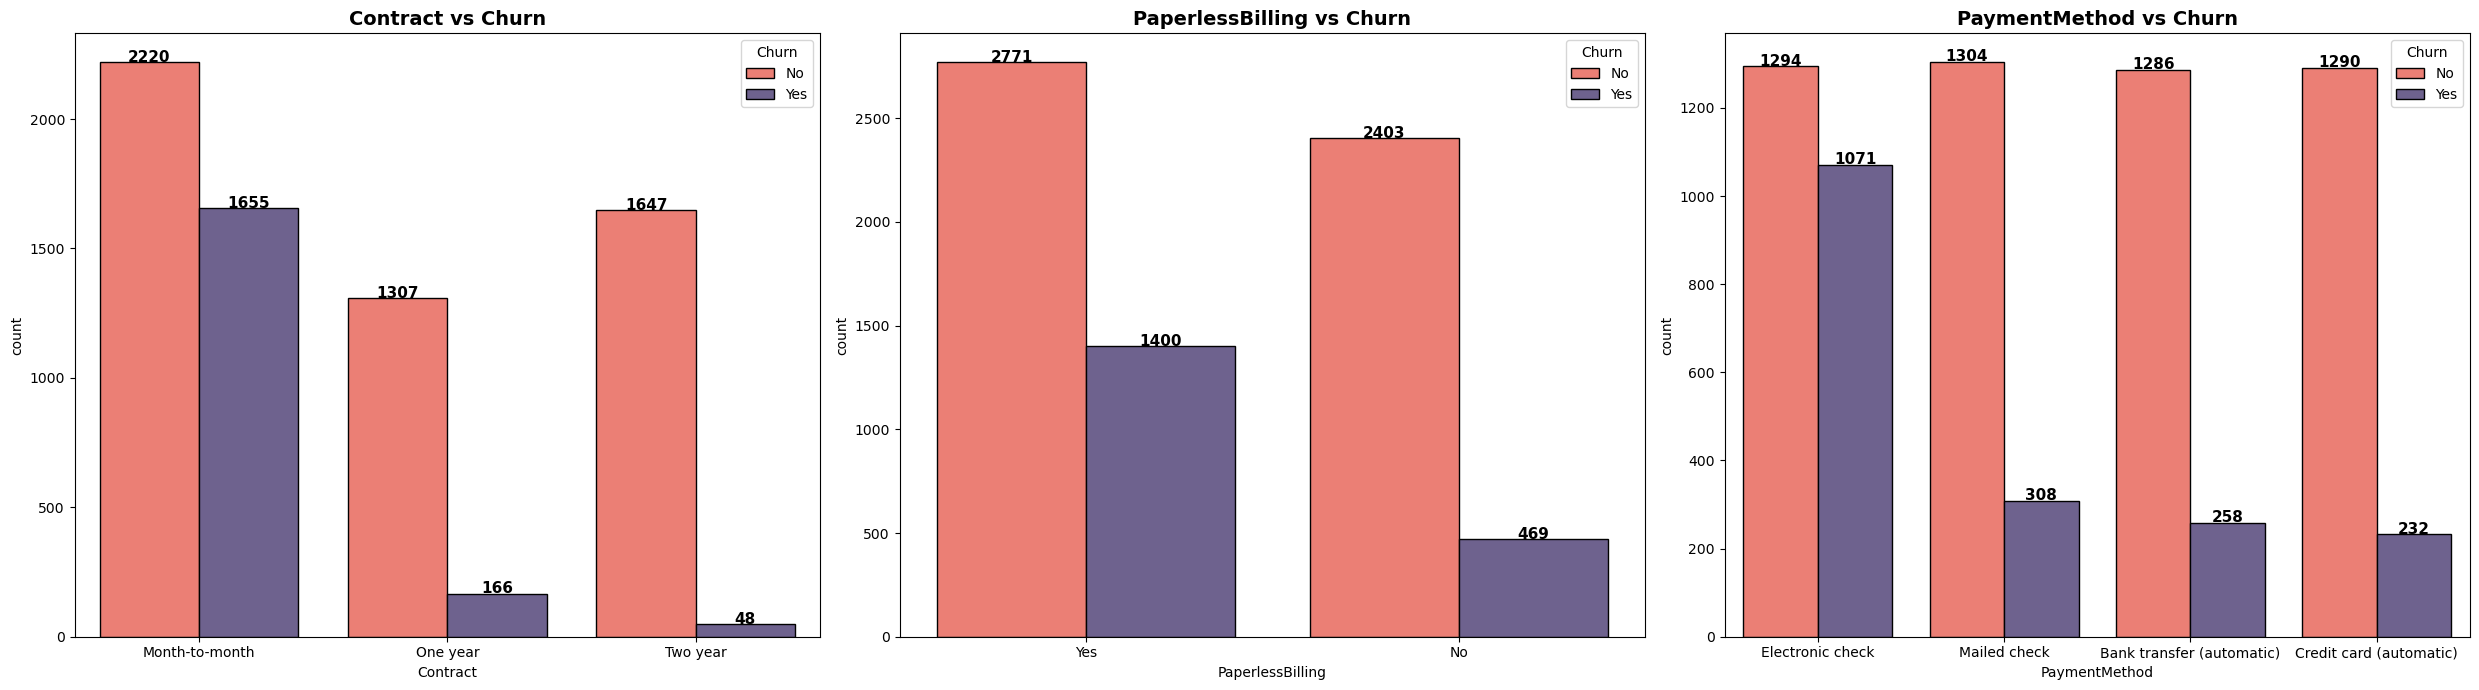

In [31]:
# Visualizes payment-related features (Contract, PaperlessBilling, PaymentMethod) against churn


colors = ['#FF6F61', '#6B5B95']  # Coral Red & Royal Purple

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,7))

for i, col in enumerate(l3):
    plt.subplot(1, 3, i+1)
    ax = sns.countplot(x=col, data=data, hue="Churn", palette=colors, edgecolor='black')
    
    # Add counts on top of bars
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2,
                rect.get_height() + 2,
                rect.get_height(),
                ha='center', fontsize=11, fontweight='bold')
    
    plt.title(f'{col} vs Churn', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [32]:
# Percentage of churned customers for each category within a given feature (like Gender, SeniorCitizen, Partner, Dependents).

def churn_percentages(df, column):
    counts = df[df['Churn'] == 1][column].value_counts()
    return (counts / counts.sum() * 100).round(2)

print(churn_percentages(df1, 'Gender'))
print(churn_percentages(df1, 'SeniorCitizen'))
print(churn_percentages(df1, 'Partner'))
print(churn_percentages(df1, 'Dependents'))

0   50.24
1   49.76
Name: Gender, dtype: float64
0   74.53
1   25.47
Name: SeniorCitizen, dtype: float64
0   64.21
1   35.79
Name: Partner, dtype: float64
0   82.56
1   17.44
Name: Dependents, dtype: float64


In [33]:
# percentage distribution of churned customers for each category within the demographic features: Gender, SeniorCitizen, Partner, and Dependents.

gender = df1[df1['Churn'] == 1]['Gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100]  # Female / Male

seniorcitizen = df1[df1['Churn'] == 1]['SeniorCitizen'].value_counts()
seniorcitizen = [seniorcitizen[0] / sum(seniorcitizen) * 100, seniorcitizen[1] / sum(seniorcitizen) * 100]  # No - Yes

partner = df1[df1['Churn'] == 1]['Partner'].value_counts()
partner = [partner[0] / sum(partner) * 100, partner[1] / sum(partner) * 100]  # No - Yes

dependents = df1[df1['Churn'] == 1]['Dependents'].value_counts()
dependents = [dependents[0] / sum(dependents) * 100, dependents[1] / sum(dependents) * 100]  # No - Yes

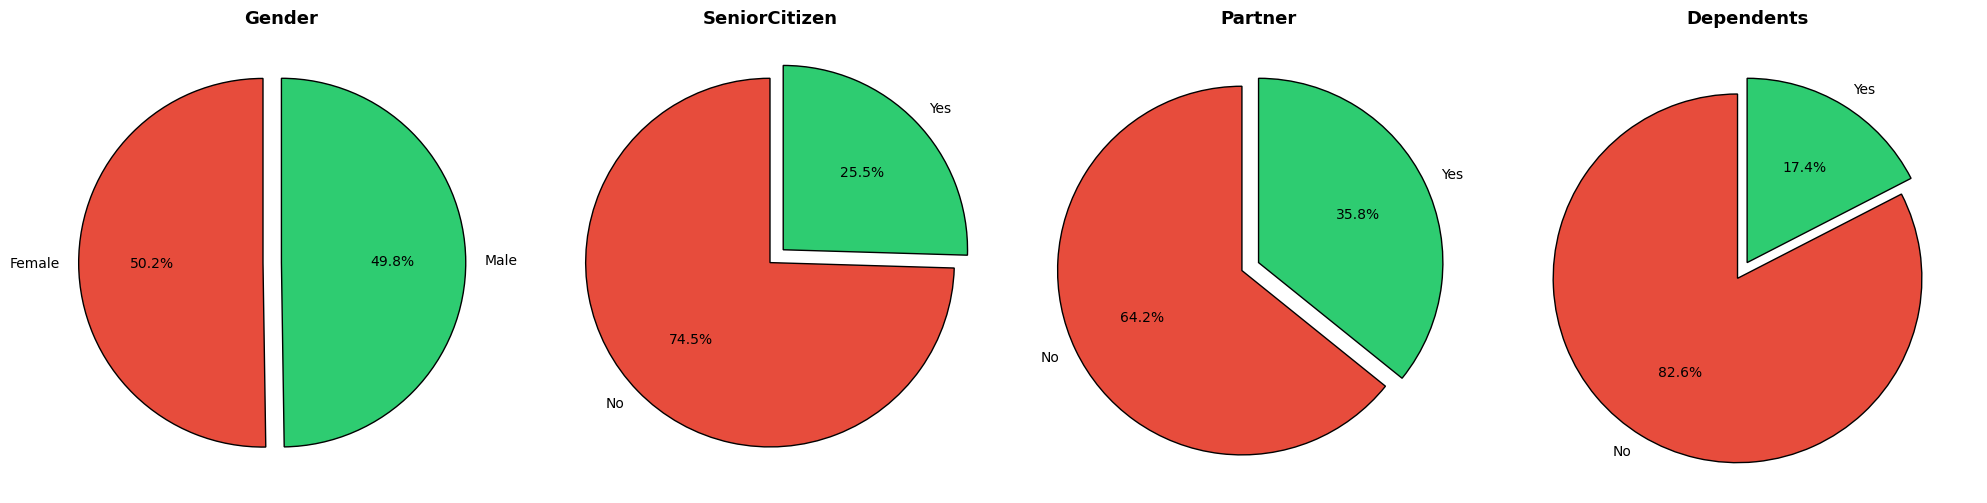

In [34]:
# Percentage of Churned Customers by Gender, Senior Status, Partner & Dependents

colors = ['#e74c3c', '#2ecc71']   # Red & Green
# or try: colors = ['#3498db', '#f39c12']  # Blue & Orange
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))

plt.subplot(1,4,1)
plt.pie(gender, labels=['Female','Male'], autopct='%1.1f%%', startangle=90, explode=(0.1,0), colors=colors,
        wedgeprops={'edgecolor':'black','linewidth':1,'antialiased':True})
plt.title('Gender', fontsize=13, fontweight='bold')

plt.subplot(1,4,2)
plt.pie(seniorcitizen, labels=['No','Yes'], autopct='%1.1f%%', startangle=90, explode=(0,0.1), colors=colors,
        wedgeprops={'edgecolor':'black','linewidth':1,'antialiased':True})
plt.title('SeniorCitizen', fontsize=13, fontweight='bold')

plt.subplot(1,4,3)
plt.pie(partner, labels=['No','Yes'], autopct='%1.1f%%', startangle=90, explode=(0.1,0), colors=colors,
        wedgeprops={'edgecolor':'black','linewidth':1,'antialiased':True})
plt.title('Partner', fontsize=13, fontweight='bold')

plt.subplot(1,4,4)
plt.pie(dependents, labels=['No','Yes'], autopct='%1.1f%%', startangle=90, explode=(0.1,0), colors=colors,
        wedgeprops={'edgecolor':'black','linewidth':1,'antialiased':True})
plt.title('Dependents', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

In [35]:
phoneservice = df1[df1['Churn'] == 1]['PhoneService'].value_counts()
phoneservice = [phoneservice[0] / sum(phoneservice) * 100, phoneservice[1] / sum(phoneservice) * 100] # No - Yes

multiplelines = df1[df1['Churn'] == 1]['MultipleLines'].value_counts()
multiplelines = [multiplelines[0] / sum(multiplelines) * 100,multiplelines[1] / sum(multiplelines) * 100, multiplelines[2] / sum(multiplelines) * 100] # No - No Phone Service - Yes 

internetservice = df1[df1['Churn'] == 1]['InternetService'].value_counts()
internetservice = [internetservice[0] / sum(internetservice) * 100,internetservice[1] / sum(internetservice) * 100, internetservice[2] / sum(internetservice) * 100] # DSL - Fiber Optic - No 

streamingtv = df1[df1['Churn'] == 1]['StreamingTV'].value_counts()
streamingtv = [streamingtv[0] / sum(streamingtv) * 100,streamingtv[1] / sum(streamingtv) * 100, streamingtv[2] / sum(streamingtv) * 100] # No - No Internet Service - Yes 

streamingmovies = df1[df1['Churn'] == 1]['StreamingMovies'].value_counts()
streamingmovies = [streamingmovies[0] / sum(streamingmovies) * 100,streamingmovies[1] / sum(streamingmovies) * 100, streamingmovies[2] / sum(streamingmovies) * 100] # No - No Internet Service - Yes 

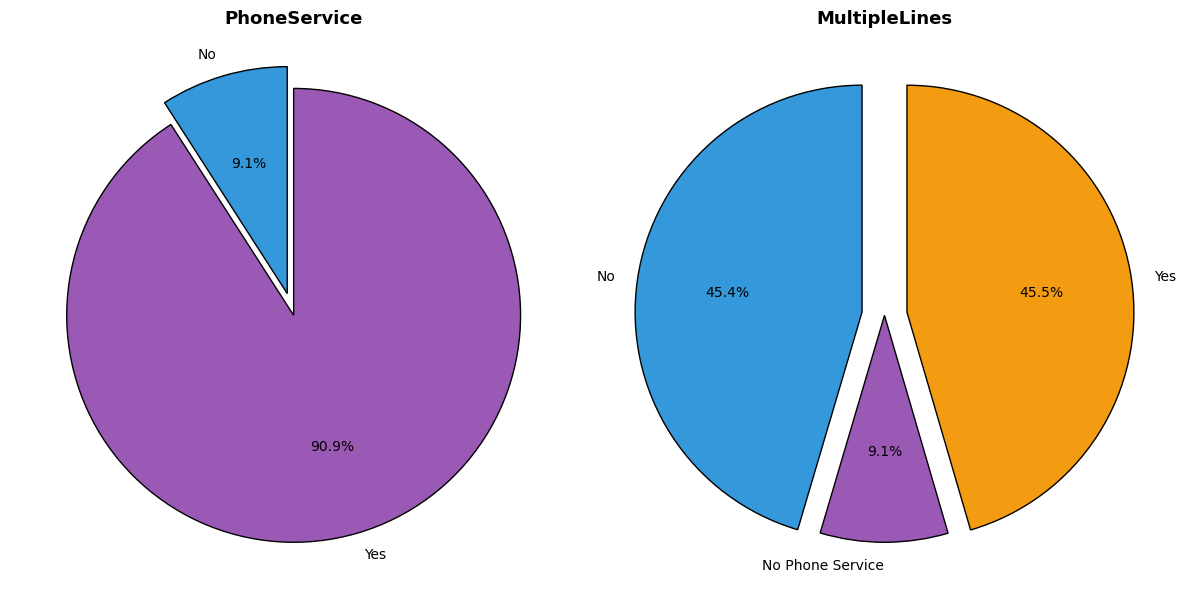

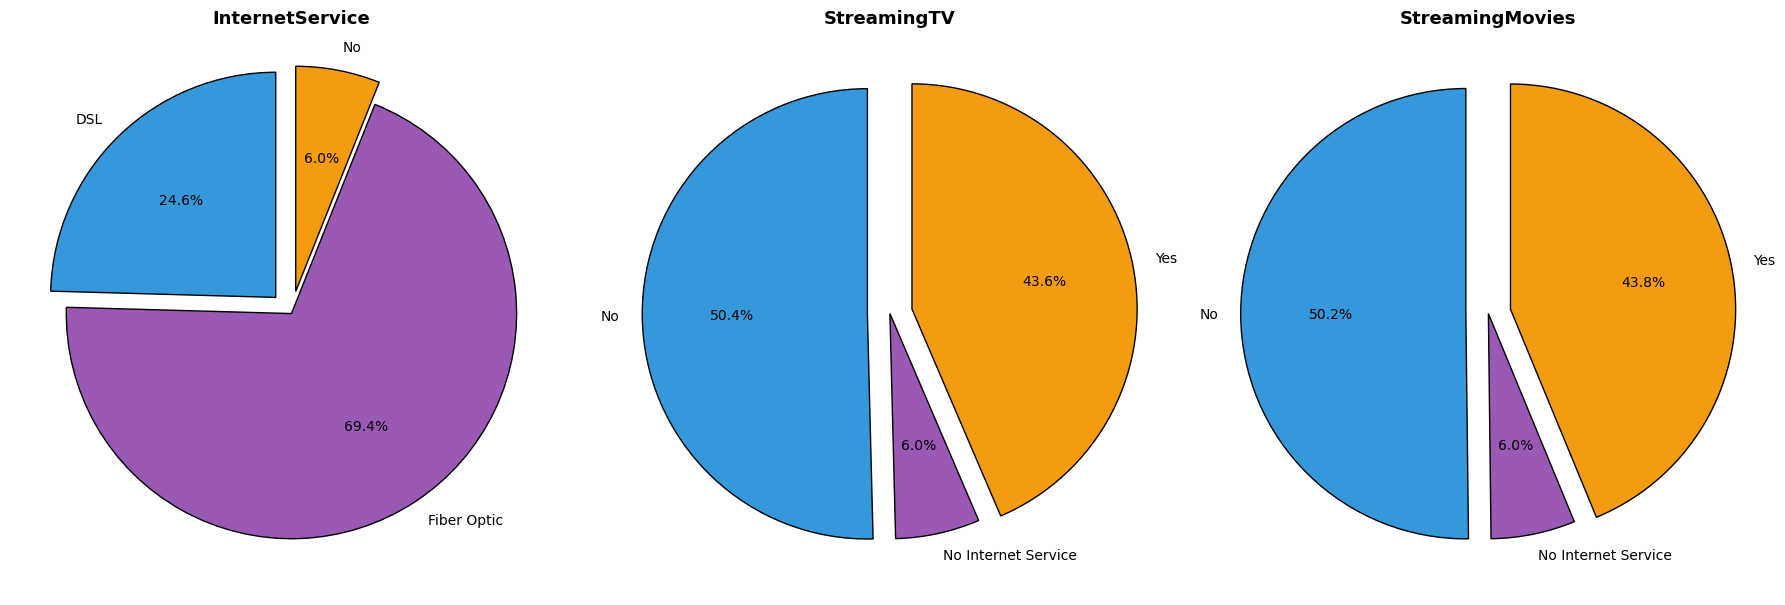

In [36]:
# Consistent sharp colors (Blue & Purple theme)
colors_2 = ['#3498db', '#9b59b6']                    # For 2-category features
colors_3 = ['#3498db', '#9b59b6', '#f39c12']         # For 3-category features (added Orange)

# ---- First Row ----
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

plt.subplot(1,2,1)
plt.pie(phoneservice, labels=['No','Yes'], autopct='%1.1f%%', startangle=90, explode=(0.1,0),
        colors=colors_2, wedgeprops={'edgecolor':'black','linewidth':1,'antialiased':True})
plt.title('PhoneService', fontsize=13, fontweight='bold')

plt.subplot(1,2,2)
plt.pie(multiplelines, labels=['No','No Phone Service','Yes'], autopct='%1.1f%%', startangle=90, explode=(0.1,0,0.1),
        colors=colors_3, wedgeprops={'edgecolor':'black','linewidth':1,'antialiased':True})
plt.title('MultipleLines', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

# ---- Second Row ----
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))

plt.subplot(1,3,1)
plt.pie(internetservice, labels=['DSL','Fiber Optic','No'], autopct='%1.1f%%', startangle=90, explode=(0.1,0,0.1),
        colors=colors_3, wedgeprops={'edgecolor':'black','linewidth':1,'antialiased':True})
plt.title('InternetService', fontsize=13, fontweight='bold')

plt.subplot(1,3,2)
plt.pie(streamingtv, labels=['No','No Internet Service','Yes'], autopct='%1.1f%%', startangle=90, explode=(0.1,0,0.1),
        colors=colors_3, wedgeprops={'edgecolor':'black','linewidth':1,'antialiased':True})
plt.title('StreamingTV', fontsize=13, fontweight='bold')

plt.subplot(1,3,3)
plt.pie(streamingmovies, labels=['No','No Internet Service','Yes'], autopct='%1.1f%%', startangle=90, explode=(0.1,0,0.1),
        colors=colors_3, wedgeprops={'edgecolor':'black','linewidth':1,'antialiased':True})
plt.title('StreamingMovies', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

In [37]:
onlinesecurity = df1[df1['Churn'] == 1]['OnlineSecurity'].value_counts()
onlinesecurity = [onlinesecurity[0] / sum(onlinesecurity) * 100,onlinesecurity[1] / sum(onlinesecurity) * 100, onlinesecurity[2] / sum(onlinesecurity) * 100] # No - No Internet Service - Yes 

onlinebackup = df1[df1['Churn'] == 1]['OnlineBackup'].value_counts()
onlinebackup = [onlinebackup[0] / sum(onlinebackup) * 100,onlinebackup[1] / sum(onlinebackup) * 100, onlinebackup[2] / sum(onlinebackup) * 100] # No - No Internet Service - Yes 

deviceprotection = df1[df1['Churn'] == 1]['DeviceProtection'].value_counts()
deviceprotection = [deviceprotection[0] / sum(deviceprotection) * 100,deviceprotection[1] / sum(deviceprotection) * 100, deviceprotection[2] / sum(deviceprotection) * 100] # No - No Internet Service - Yes 

techsupport = df1[df1['Churn'] == 1]['TechSupport'].value_counts()
techsupport = [techsupport[0] / sum(techsupport) * 100,techsupport[1] / sum(techsupport) * 100, techsupport[2] / sum(techsupport) * 100] # No - No Internet Service - Yes 

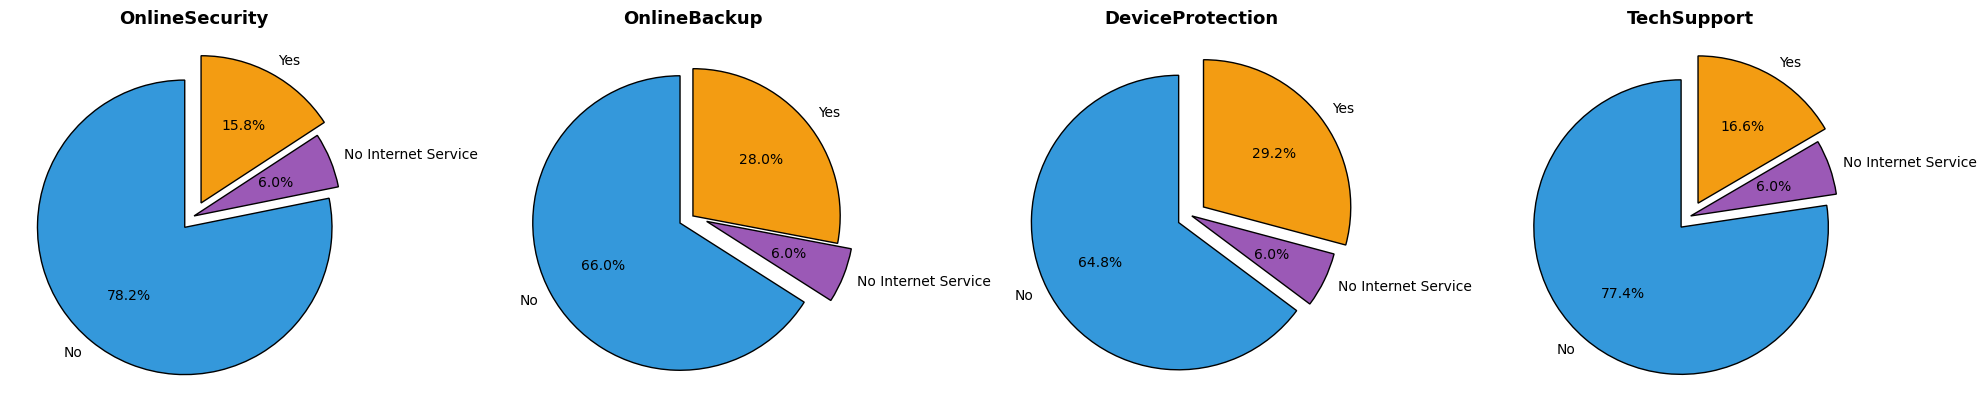

In [38]:

colors_3 = ['#3498db', '#9b59b6', '#f39c12']   # Blue, Purple, Orange

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,6))

plt.subplot(1,4,1)
plt.pie(onlinesecurity, labels=['No', 'No Internet Service','Yes'], autopct='%1.1f%%', 
        startangle=90, explode=(0.1,0,0.1), colors=colors_3,
        wedgeprops={'edgecolor':'black','linewidth':1,'antialiased':True})
plt.title('OnlineSecurity', fontsize=13, fontweight='bold')

plt.subplot(1,4,2)
plt.pie(onlinebackup, labels=['No', 'No Internet Service','Yes'], autopct='%1.1f%%', 
        startangle=90, explode=(0.1,0.1,0), colors=colors_3,
        wedgeprops={'edgecolor':'black','linewidth':1,'antialiased':True})
plt.title('OnlineBackup', fontsize=13, fontweight='bold')

plt.subplot(1,4,3)
plt.pie(deviceprotection, labels=['No', 'No Internet Service','Yes'], autopct='%1.1f%%', 
        startangle=90, explode=(0.1,0,0.1), colors=colors_3,
        wedgeprops={'edgecolor':'black','linewidth':1,'antialiased':True})
plt.title('DeviceProtection', fontsize=13, fontweight='bold')

plt.subplot(1,4,4)
plt.pie(techsupport, labels=['No', 'No Internet Service','Yes'], autopct='%1.1f%%', 
        startangle=90, explode=(0.1,0,0.1), colors=colors_3,
        wedgeprops={'edgecolor':'black','linewidth':1,'antialiased':True})
plt.title('TechSupport', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

In [39]:
contract = df1[df1['Churn'] == 1]['Contract'].value_counts()
contract = [contract[0] / sum(contract) * 100, contract[1] / sum(contract) * 100, contract[2] / sum(contract) * 100] # Month-to-month - One year - Two year

paperlessbilling = df1[df1['Churn'] == 1]['PaperlessBilling'].value_counts()
paperlessbilling = [paperlessbilling[0] / sum(paperlessbilling) * 100,paperlessbilling[1] / sum(paperlessbilling) * 100] # No - Yes 

paymentmethod = df1[df1['Churn'] == 1]['PaymentMethod'].value_counts()
paymentmethod = [paymentmethod[0] / sum(paymentmethod) * 100, paymentmethod[1] / sum(paymentmethod) * 100, 
            paymentmethod[2] / sum(paymentmethod) * 100, paymentmethod[3] / sum(paymentmethod) * 100] 
            # Bank Transfer (automatic) - Credit Card (automatic) - Electronic check - Mailed check

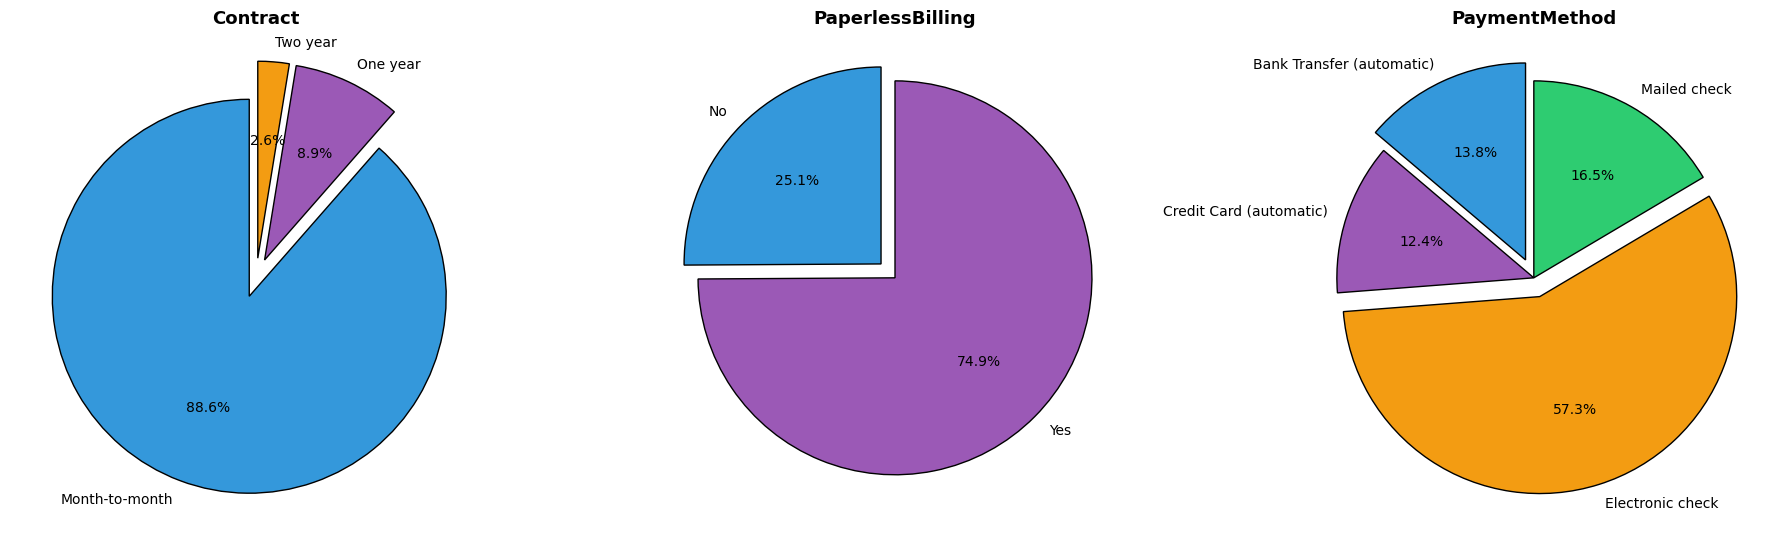

In [40]:

colors_4 = ['#3498db', '#9b59b6', '#f39c12', '#2ecc71']   # Blue, Purple, Orange, Green

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))

# Contract (3 categories)
plt.subplot(1,3,1)
plt.pie(contract, labels=['Month-to-month','One year','Two year'], autopct='%1.1f%%', 
        startangle=90, explode=(0.1,0.1,0.1), colors=colors_4[:3],
        wedgeprops={'edgecolor':'black','linewidth':1,'antialiased':True})
plt.title('Contract', fontsize=13, fontweight='bold')

# Paperless Billing (2 categories)
plt.subplot(1,3,2)
plt.pie(paperlessbilling, labels=['No', 'Yes'], autopct='%1.1f%%', 
        startangle=90, explode=(0.1,0), colors=colors_4[:2],
        wedgeprops={'edgecolor':'black','linewidth':1,'antialiased':True})
plt.title('PaperlessBilling', fontsize=13, fontweight='bold')

# Payment Method (4 categories)
plt.subplot(1,3,3)
plt.pie(paymentmethod, labels=['Bank Transfer (automatic)','Credit Card (automatic)',
                               'Electronic check','Mailed check'], autopct='%1.1f%%', 
        startangle=90, explode=(0.1,0,0.1,0), colors=colors_4,
        wedgeprops={'edgecolor':'black','linewidth':1,'antialiased':True})
plt.title('PaymentMethod', fontsize=13, fontweight='bold')

plt.tight_layout()

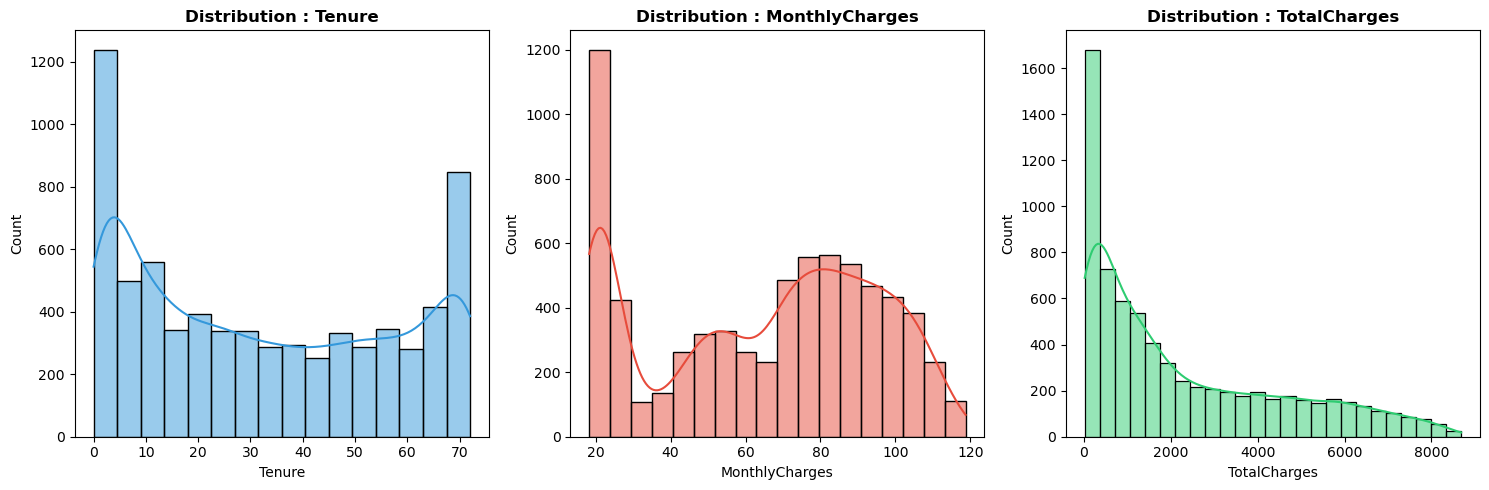

In [41]:
# Distribution of Numerical Features

colors_sharp = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6', '#f39c12']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for i in range(len(numerical_features)):
    plt.subplot(1,3,i+1)
    sns.histplot(df1[numerical_features[i]], kde=True, color=colors_sharp[i], edgecolor='black')
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


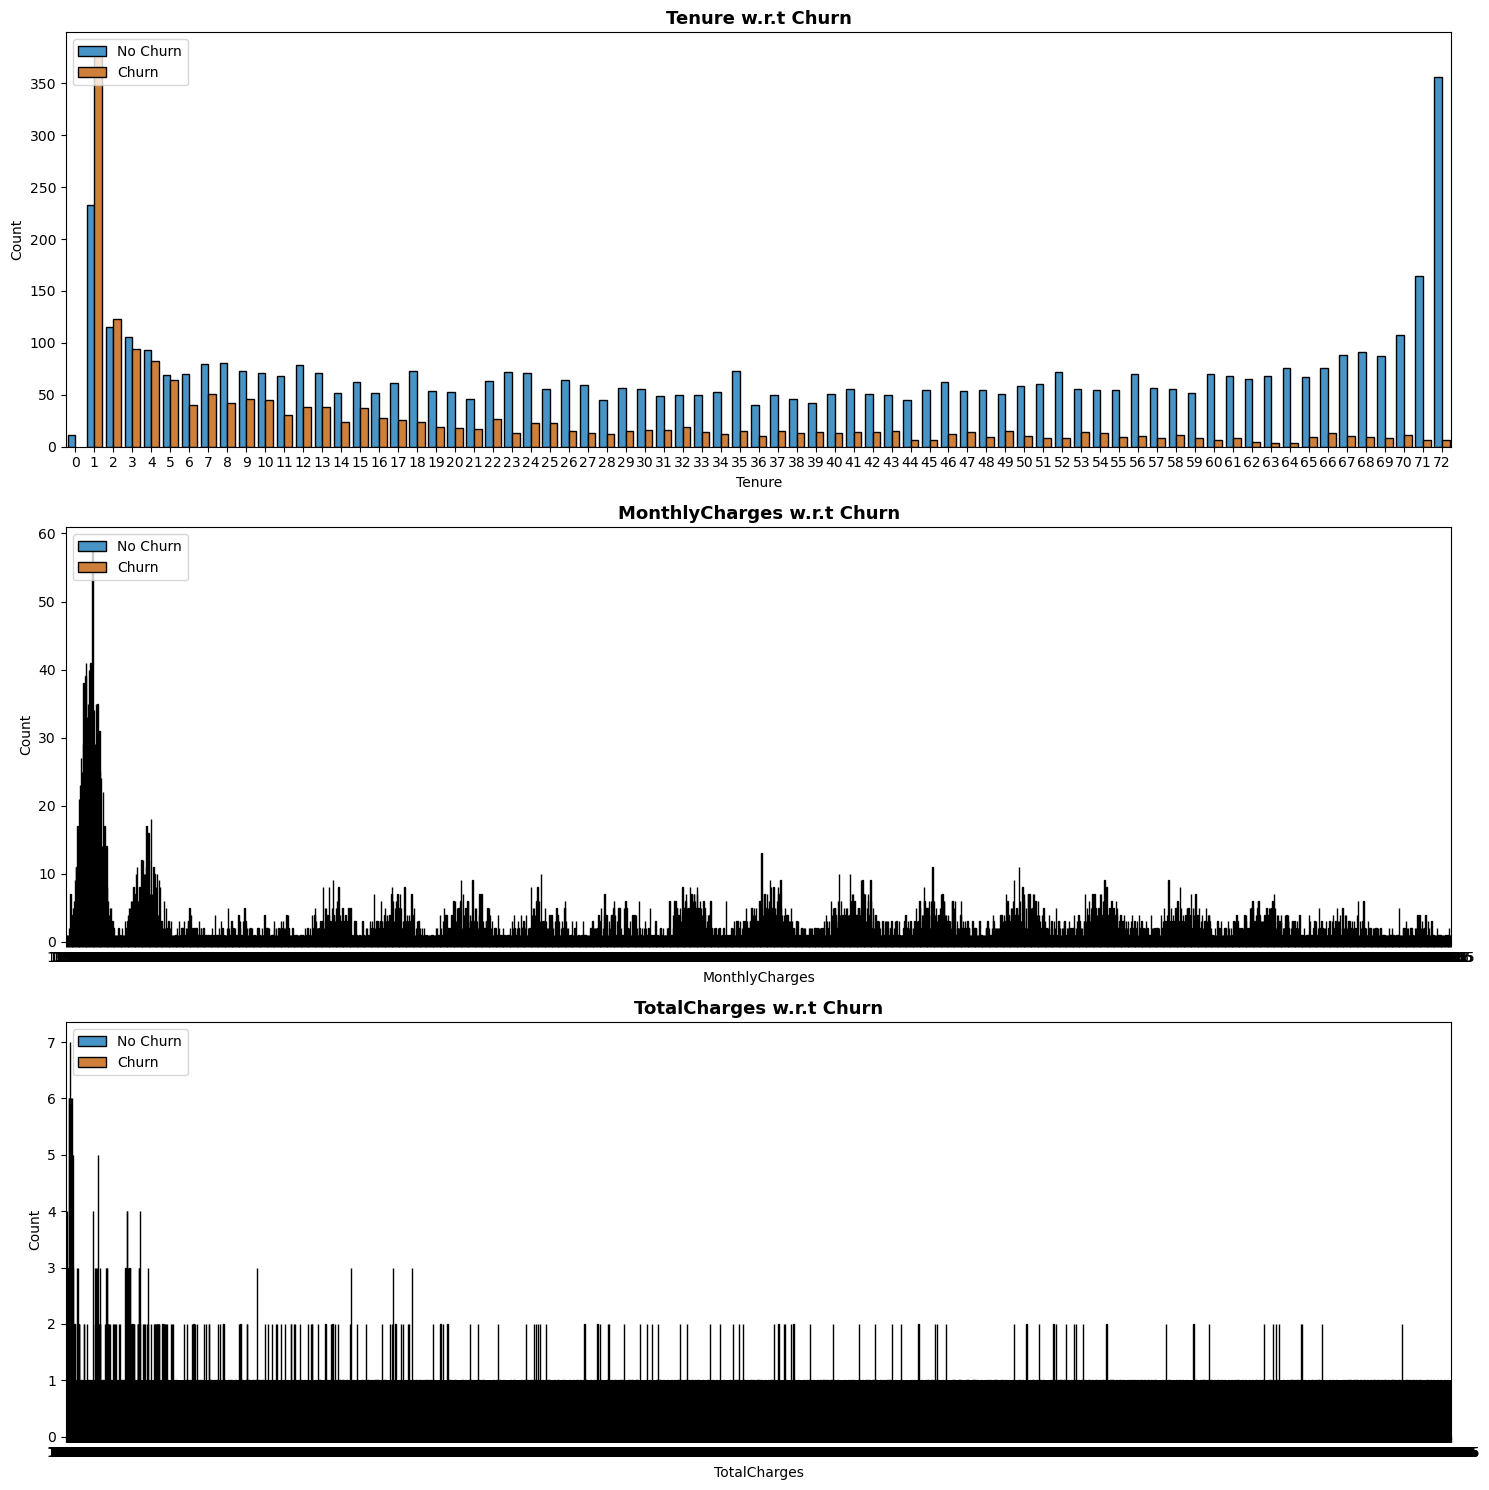

In [42]:
# Numerical Features w.r.t Target Variable (Outcome)

colors_nice = ['#3498db', '#e67e22']  

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,15))

for i in range(len(numerical_features)):
    plt.subplot(3,1,i+1)
    ax = sns.countplot(
        x=numerical_features[i], 
        data=df1, 
        hue="Churn", 
        palette=colors_nice, 
        edgecolor='black'
    )
    plt.legend(['No Churn','Churn'], loc='upper left')
    title = numerical_features[i] + ' w.r.t Churn'
    plt.title(title, fontsize=13, fontweight='bold')
    plt.xlabel(numerical_features[i])
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

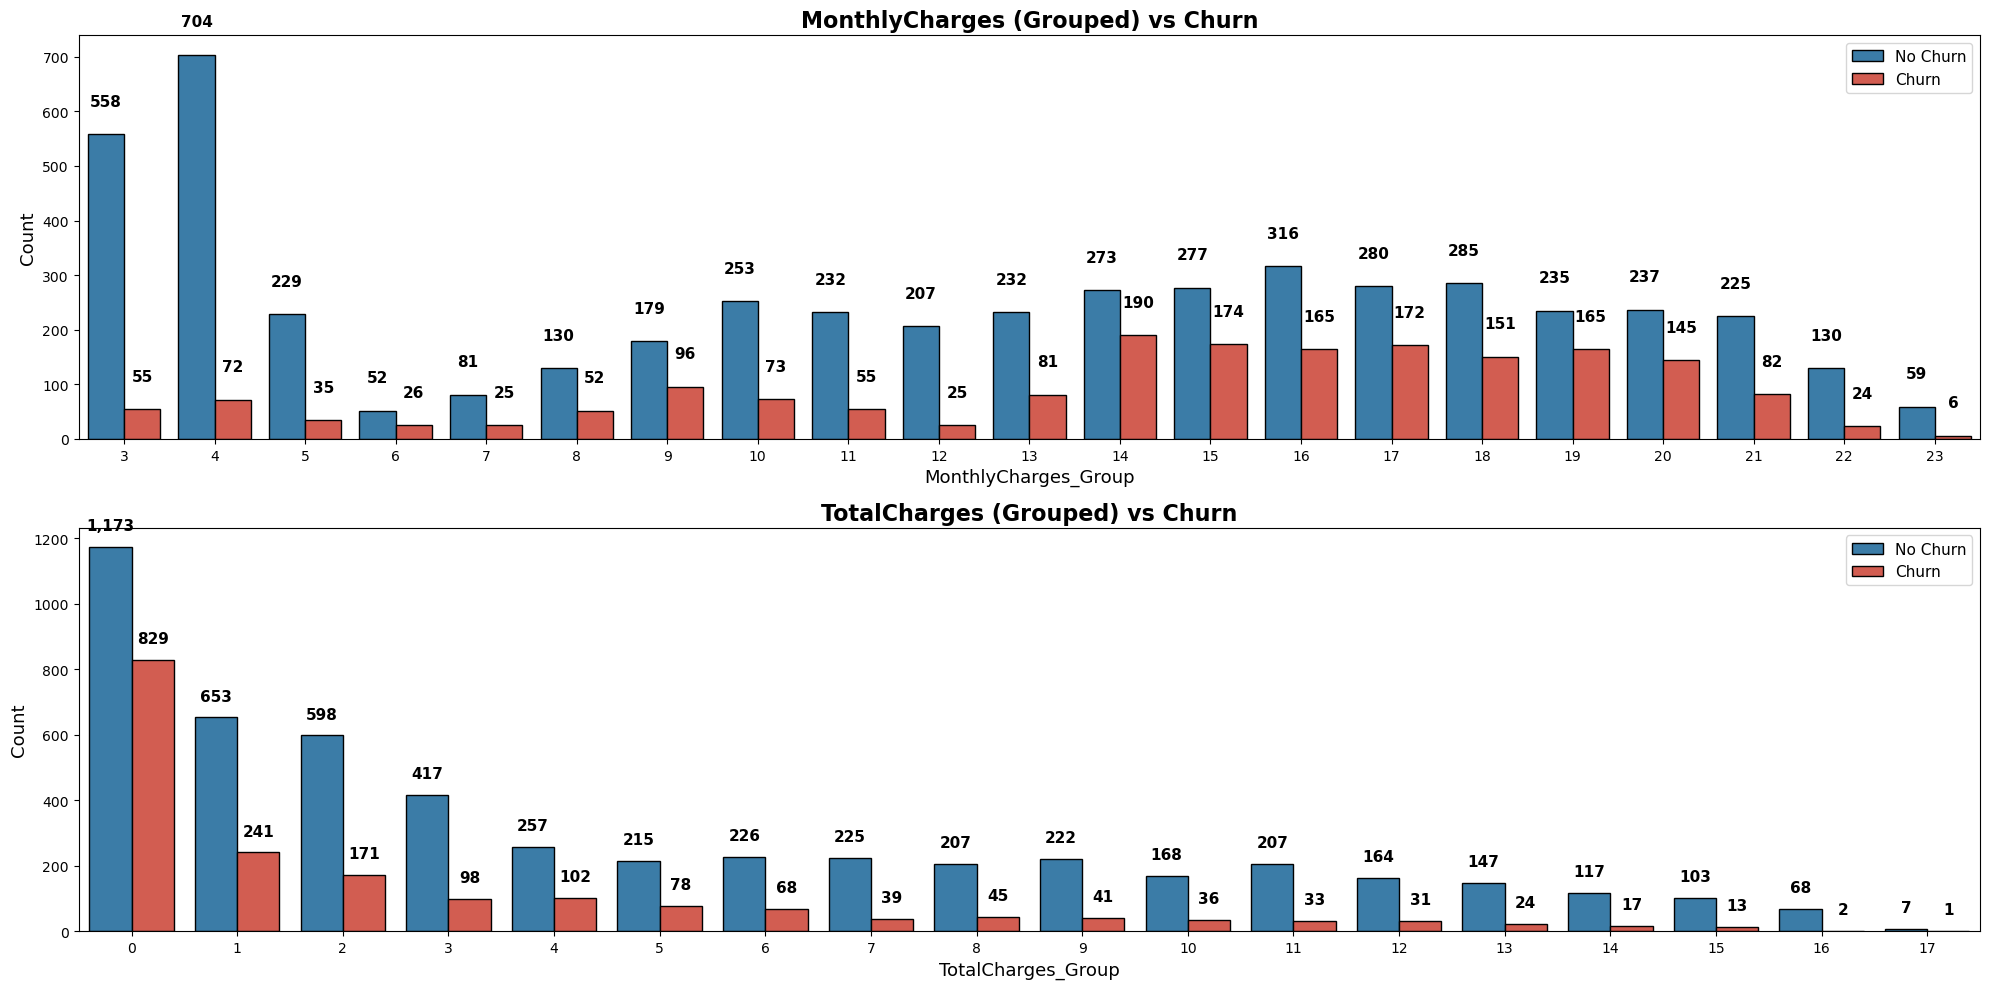

In [43]:
# Create grouped features
df1['MonthlyCharges_Group'] = [int(i / 5) for i in df1['MonthlyCharges']]
df1['TotalCharges_Group'] = [int(i / 500) for i in df1['TotalCharges']]

# Sharp, beautiful contrasting colors
colors_sharp = ['#2980b9', '#e74c3c']  # Blue = No Churn, Red-Orange = Churn

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,10))

for i in range(len(numerical_features[1:])):  # Skip 'tenure'
    plt.subplot(2,1,i+1)
    ax = sns.countplot(
        x=numerical_features[1+i] + '_Group',
        data=df1,
        hue="Churn",
        palette=colors_sharp,
        edgecolor='black'
    )

    # Add count labels above bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2, 
            height + max(df1['Churn'].value_counts())*0.01,  # dynamic spacing
            f'{height:,}', 
            ha="center", fontsize=11, fontweight='bold', color='black'
        )

    # Formatting
    plt.legend(['No Churn','Churn'], loc='upper right', fontsize=11)
    title = numerical_features[1+i] + ' (Grouped) vs Churn'
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(numerical_features[1+i] + '_Group', fontsize=13)
    plt.ylabel("Count", fontsize=13)

plt.tight_layout()
plt.show()


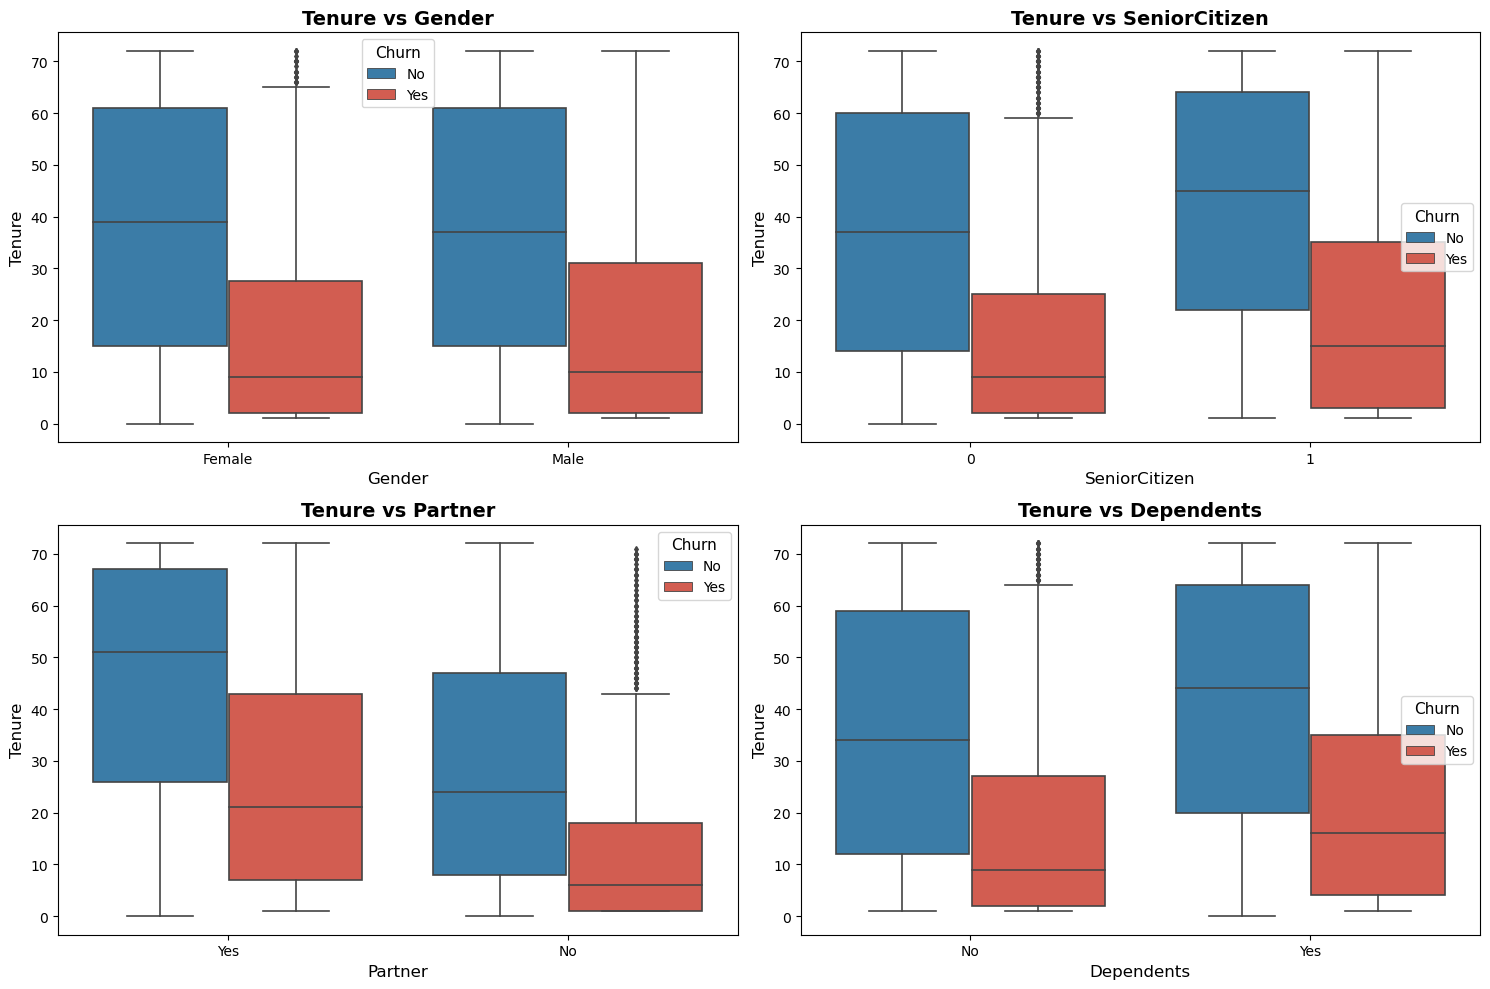

In [44]:
# Sharp contrasting colors
colors_sharp = ['#2980b9', '#e74c3c']  # Blue = No Churn, Red = Churn

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(
        x=l1[i], 
        y='Tenure',
        data=data, 
        hue='Churn', 
        palette=colors_sharp,
        fliersize=3,   # smaller outliers for neatness
        linewidth=1.2  # sharper edges
    )
    
    # Title formatting
    plt.title('Tenure vs ' + l1[i], fontsize=14, fontweight='bold')
    plt.xlabel(l1[i], fontsize=12)
    plt.ylabel('Tenure', fontsize=12)
    plt.legend(title="Churn", fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()


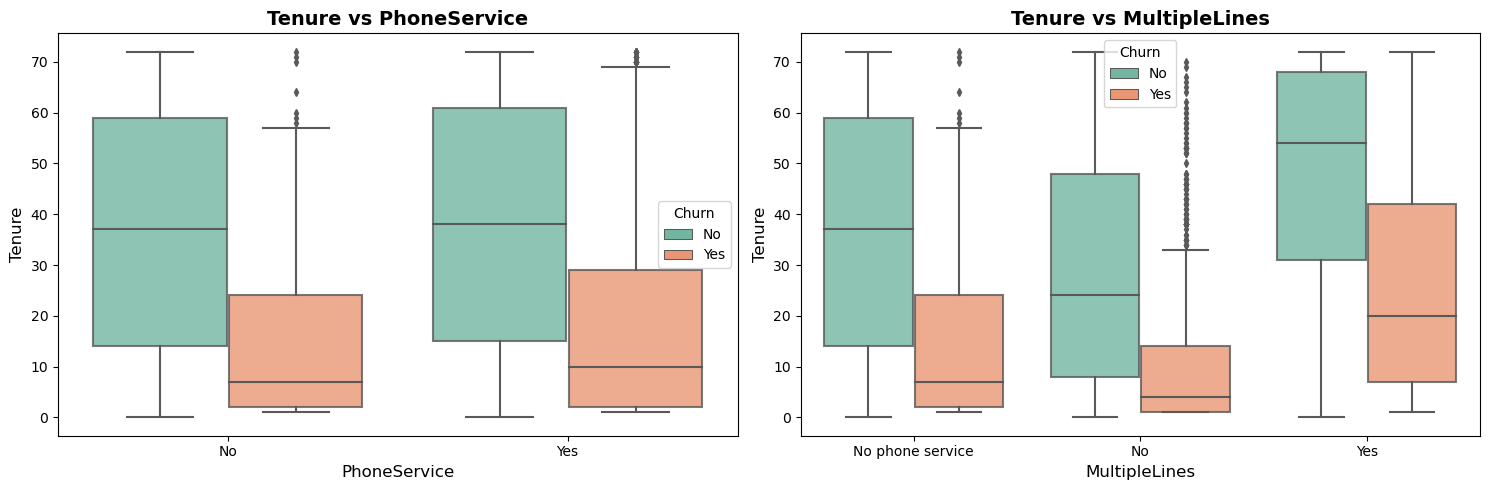

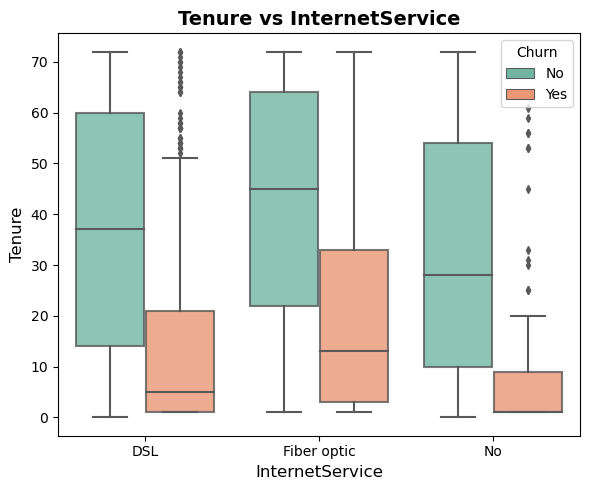

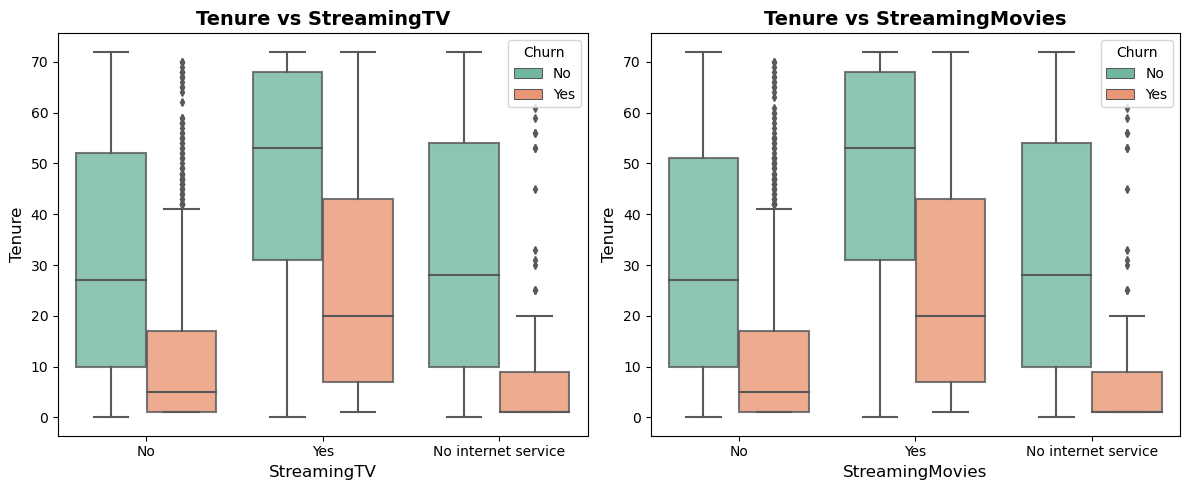

In [45]:
# Use a sharp, professional color palette
colors = sns.color_palette("Set2")  # alternative: "husl", "Paired", "bright"

# First row (2 subplots)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
for i in range(len(l2[0:2])):
    plt.subplot(1,2,i+1)
    ax = sns.boxplot(
        x=l2[i], y='Tenure', data=data, hue='Churn', 
        palette=colors, linewidth=1.5, fliersize=4, 
        boxprops=dict(alpha=0.8)
    )
    plt.title('Tenure vs ' + l2[i], fontsize=14, fontweight='bold')
    plt.xlabel(l2[i], fontsize=12)
    plt.ylabel("Tenure", fontsize=12)

plt.tight_layout()
plt.show()

# Second row (1 subplot)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,5))
sns.boxplot(
    x=l2[2], y='Tenure', data=data, hue='Churn', 
    palette=colors, linewidth=1.5, fliersize=4,
    boxprops=dict(alpha=0.8)
)
plt.title('Tenure vs ' + l2[2], fontsize=14, fontweight='bold')
plt.xlabel(l2[2], fontsize=12)
plt.ylabel("Tenure", fontsize=12)
plt.tight_layout()
plt.show()

# Third row (2 subplots)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
for i in range(len(l2[3:5])):
    plt.subplot(1,2,i+1)
    ax = sns.boxplot(
        x=l2[i+3], y='Tenure', data=data, hue='Churn',
        palette=colors, linewidth=1.5, fliersize=4,
        boxprops=dict(alpha=0.8)
    )
    plt.title('Tenure vs ' + l2[i+3], fontsize=14, fontweight='bold')
    plt.xlabel(l2[i+3], fontsize=12)
    plt.ylabel("Tenure", fontsize=12)

plt.tight_layout()
plt.show()

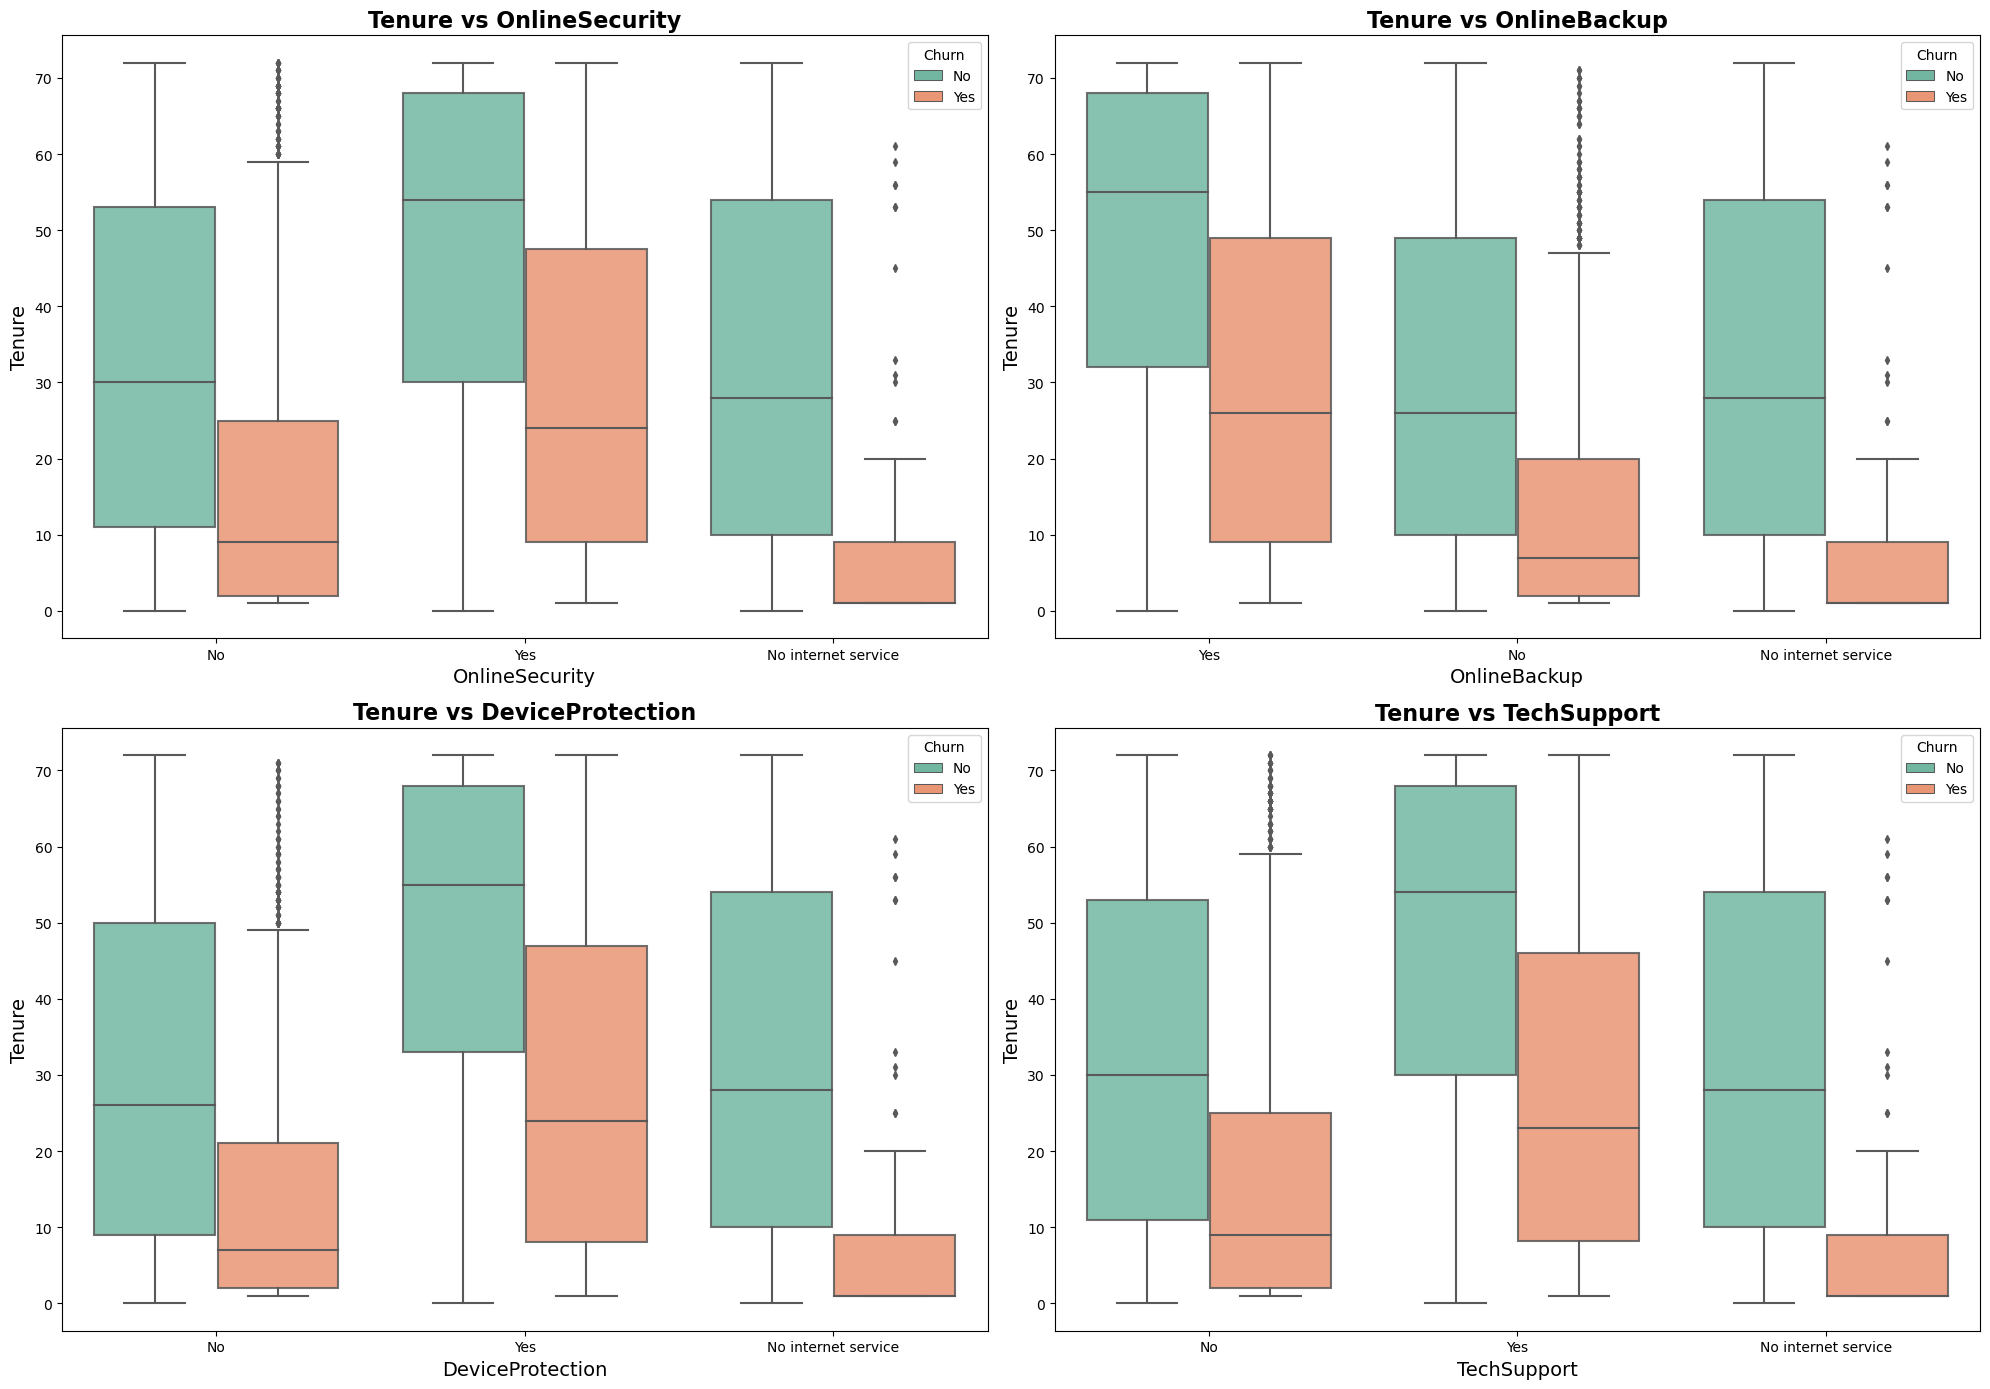

In [46]:
# tenure vs Group 2: Services Subscribed by the Customer : OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport |

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,14))

for i in range(len(l2[-4:])):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(
        x=l2[i-4], y='Tenure', data=data, hue='Churn', 
        palette=colors, linewidth=1.5, fliersize=4, 
        boxprops=dict(alpha=0.85)
    )
    plt.title('Tenure vs ' + l2[i-4], fontsize=16, fontweight='bold')
    plt.xlabel(l2[i-4], fontsize=14)
    plt.ylabel("Tenure", fontsize=14)

plt.tight_layout()
plt.show()

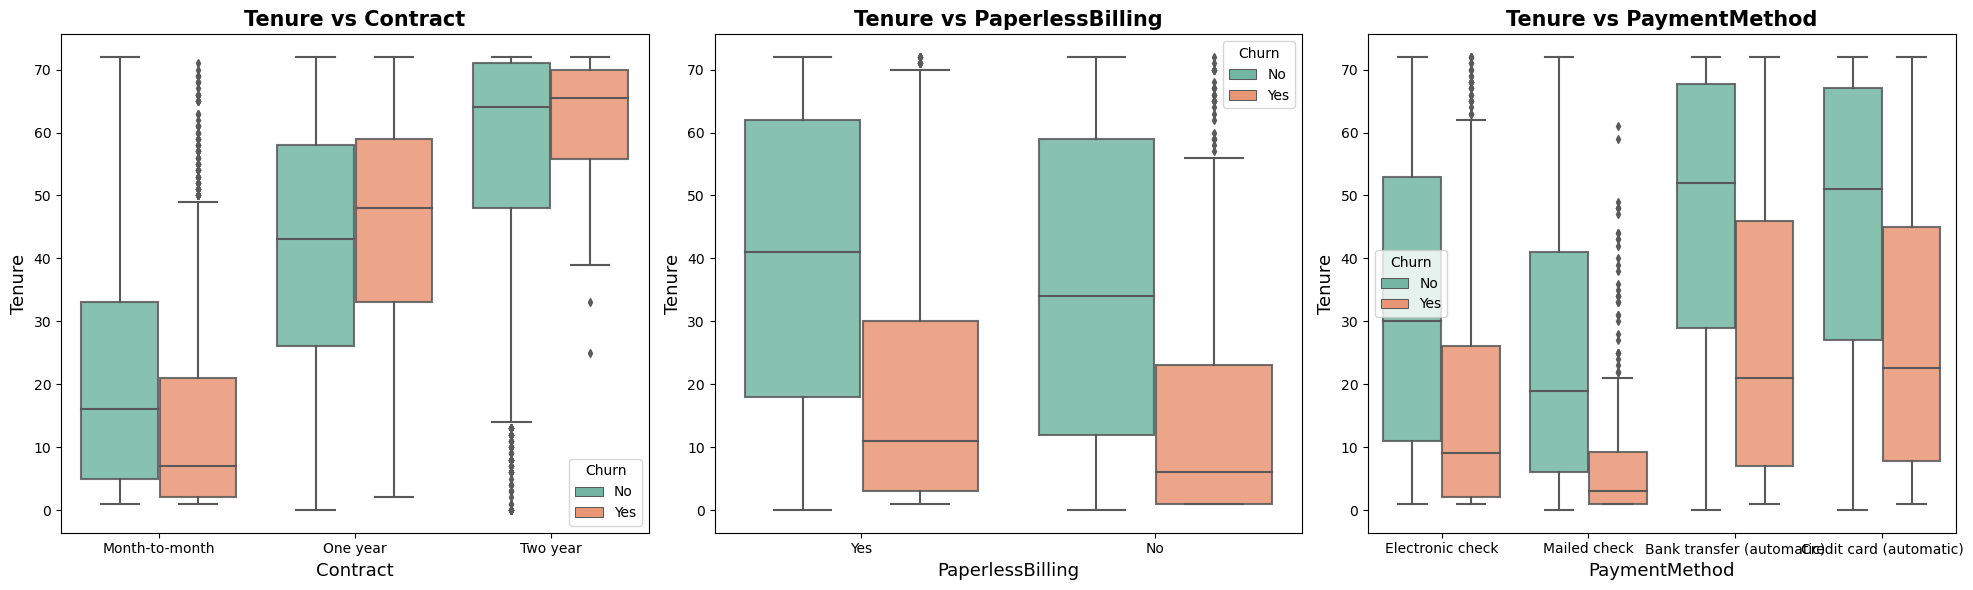

In [47]:
# tenure vs Group 3 : Contract | PaperlessBilling | PaymentMethod

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

group_features = ['Contract', 'PaperlessBilling', 'PaymentMethod']

for i, col in enumerate(group_features):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(
        x=col, y='Tenure', data=data, hue='Churn',
        palette=colors, linewidth=1.5, fliersize=4,
        boxprops=dict(alpha=0.85)
    )
    plt.title(f'Tenure vs {col}', fontsize=15, fontweight='bold')
    plt.xlabel(col, fontsize=13)
    plt.ylabel("Tenure", fontsize=13)

plt.tight_layout()
plt.show()


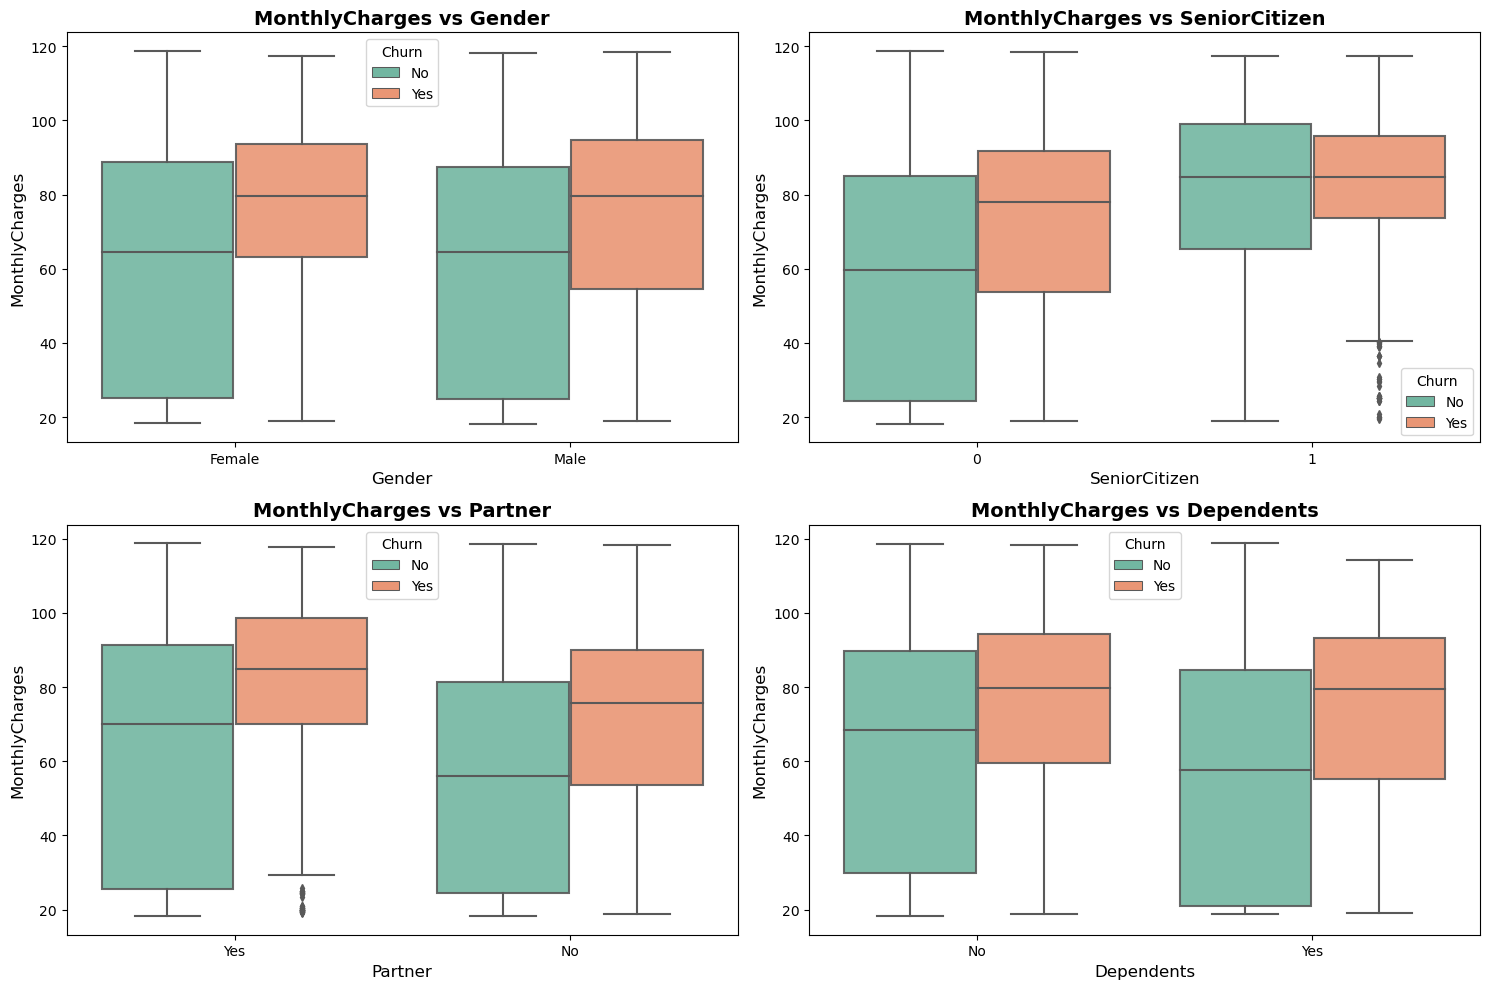

In [48]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(
        x=l1[i], y='MonthlyCharges', data=data, hue='Churn',
        palette=colors, linewidth=1.5, fliersize=4,
        boxprops=dict(alpha=0.9)
    )
    plt.title(f'MonthlyCharges vs {l1[i]}', fontsize=14, fontweight='bold')
    plt.xlabel(l1[i], fontsize=12)
    plt.ylabel("MonthlyCharges", fontsize=12)

plt.tight_layout()
plt.show()

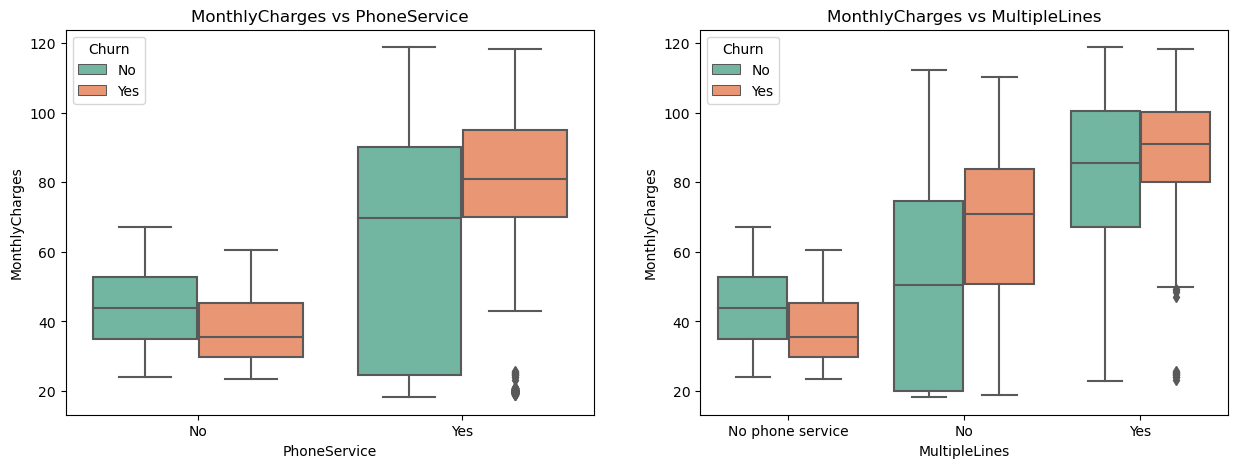

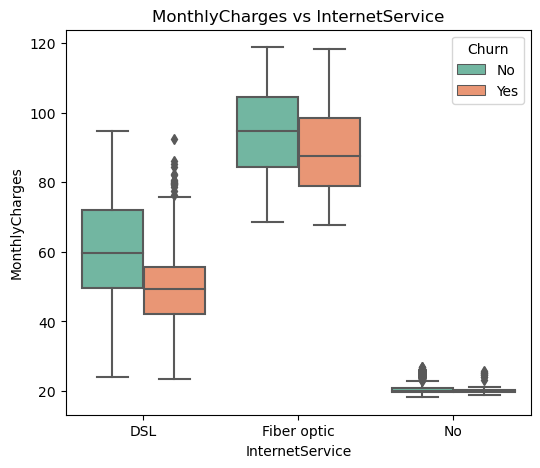

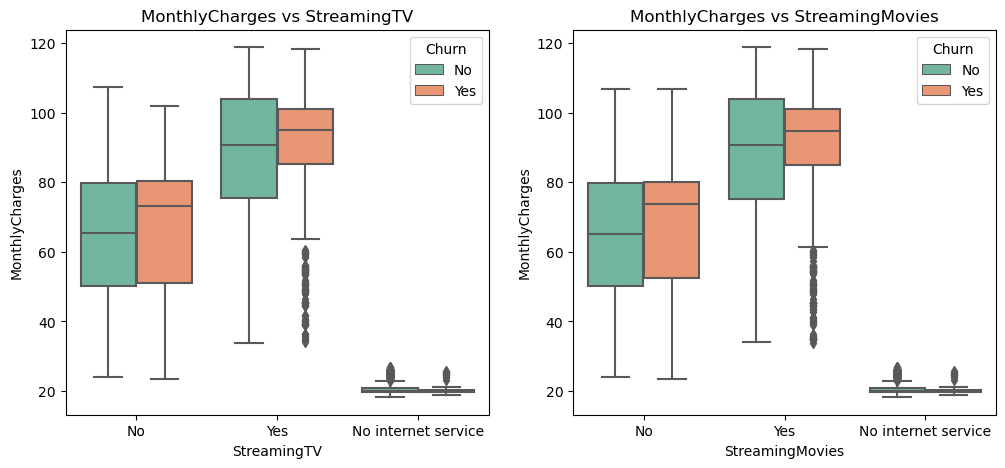

In [49]:
# MonthlyCharges vs Group 2: Services Subscribed by the Customer : PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i],y = 'MonthlyCharges',data = data,hue = 'Churn',palette = colors);
    plt.title('MonthlyCharges vs ' + l2[i]);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.boxplot(x = l2[2],y = 'MonthlyCharges',data = data,hue = 'Churn',palette = colors);
plt.title('MonthlyCharges vs ' + l2[2]);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i + 3],y = 'MonthlyCharges',data = data,hue = 'Churn',palette = colors);
    plt.title('MonthlyCharges vs ' + l2[i + 3]);

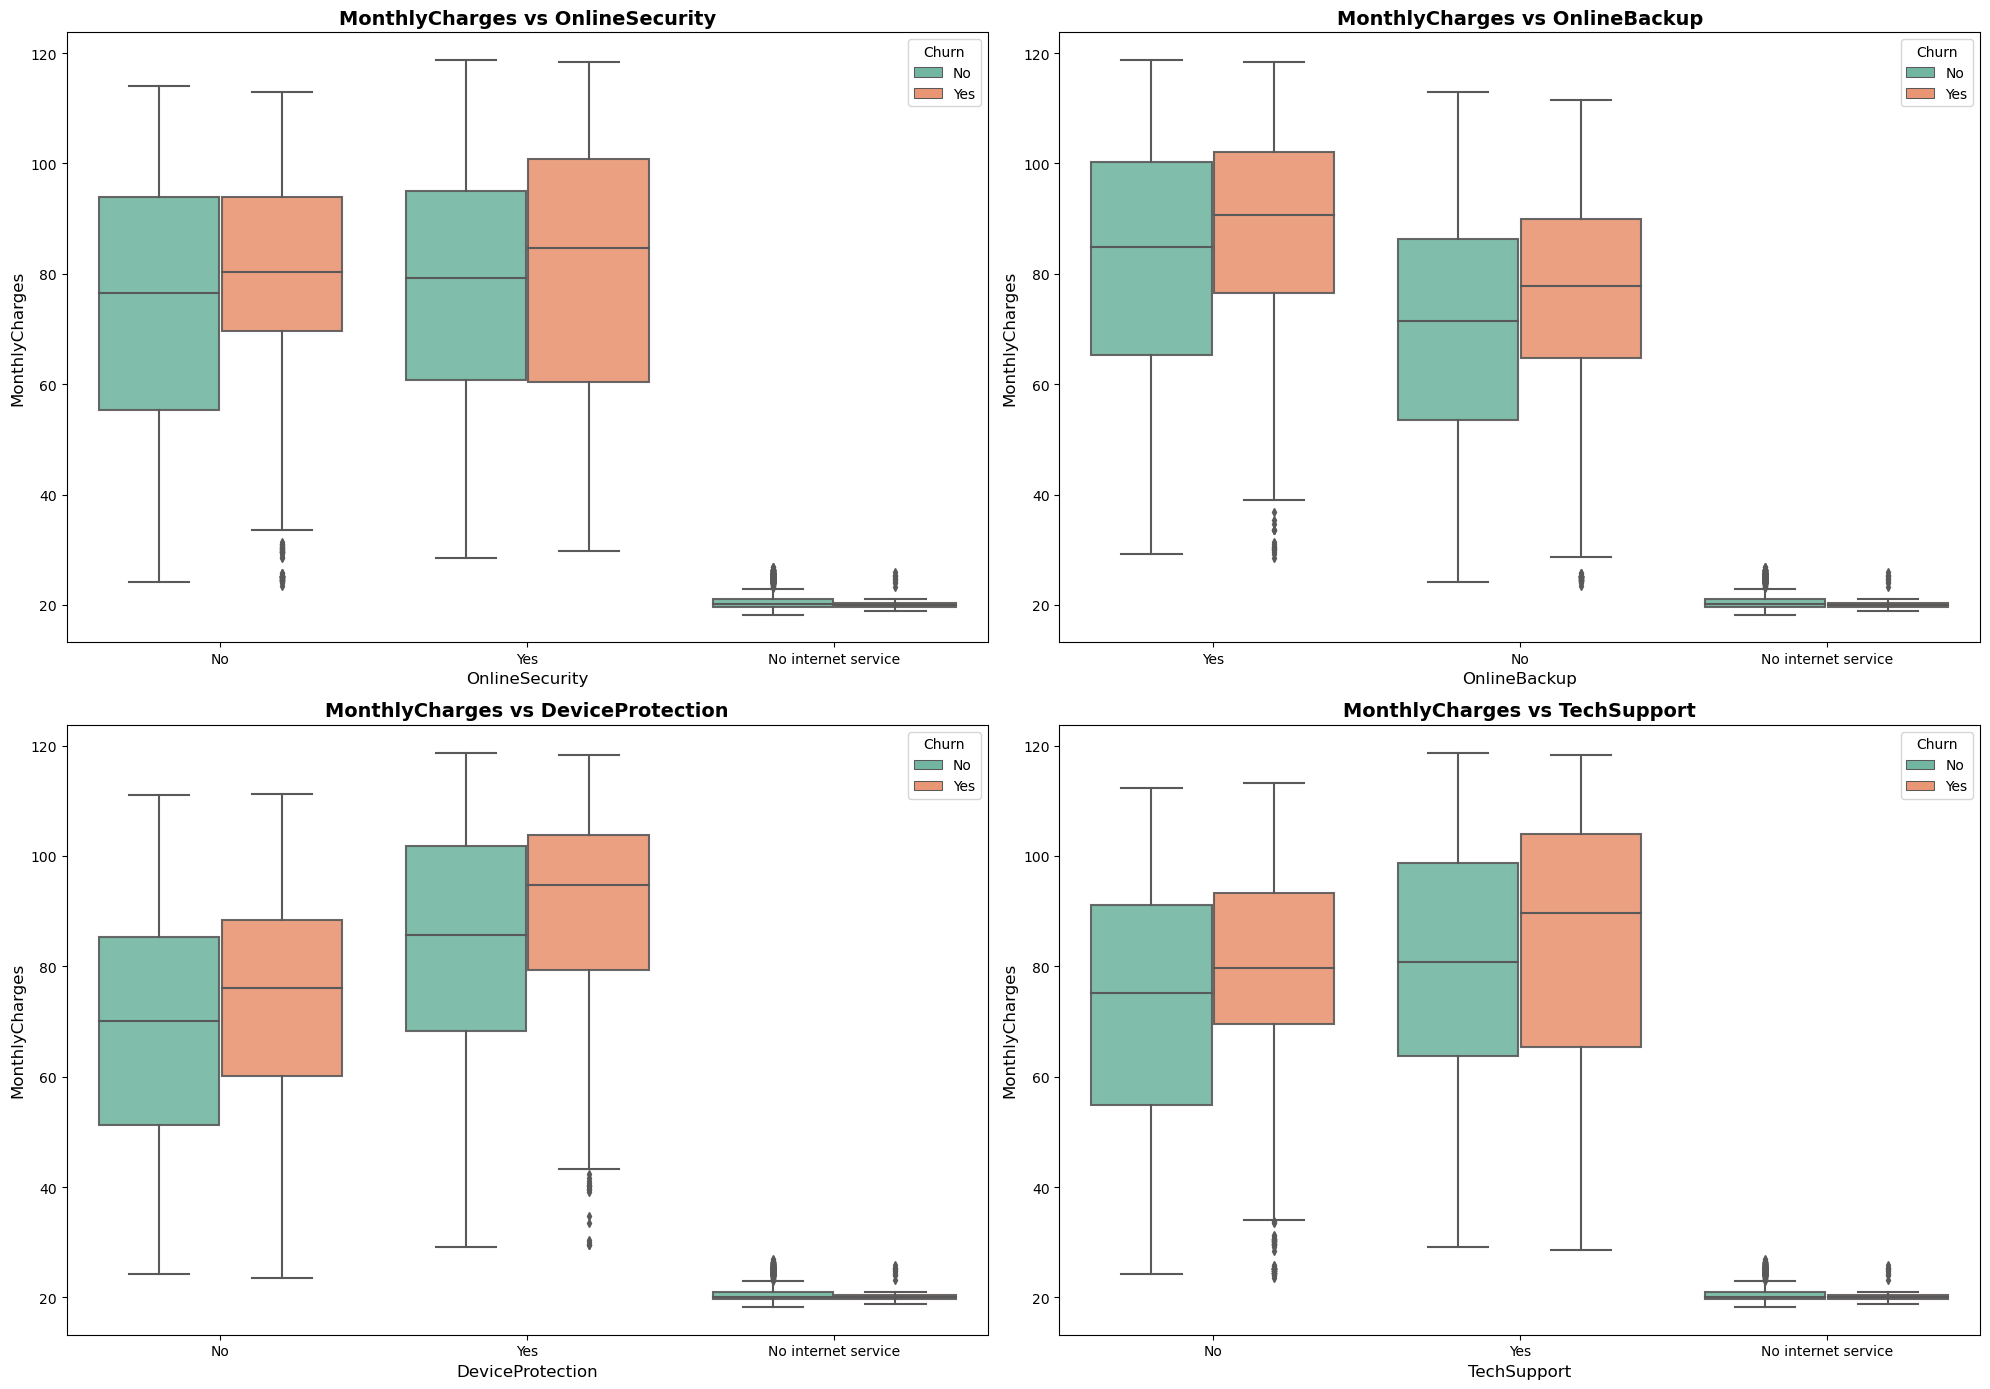

In [50]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,14))

for i in range(len(l2[-4:])):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(
        x=l2[i-4], y='MonthlyCharges', data=data, hue='Churn',
        palette=colors, linewidth=1.5, fliersize=4,
        boxprops=dict(alpha=0.9)
    )
    plt.title(f'MonthlyCharges vs {l2[i-4]}', fontsize=14, fontweight='bold')
    plt.xlabel(l2[i-4], fontsize=12)
    plt.ylabel("MonthlyCharges", fontsize=12)

plt.tight_layout()
plt.show()

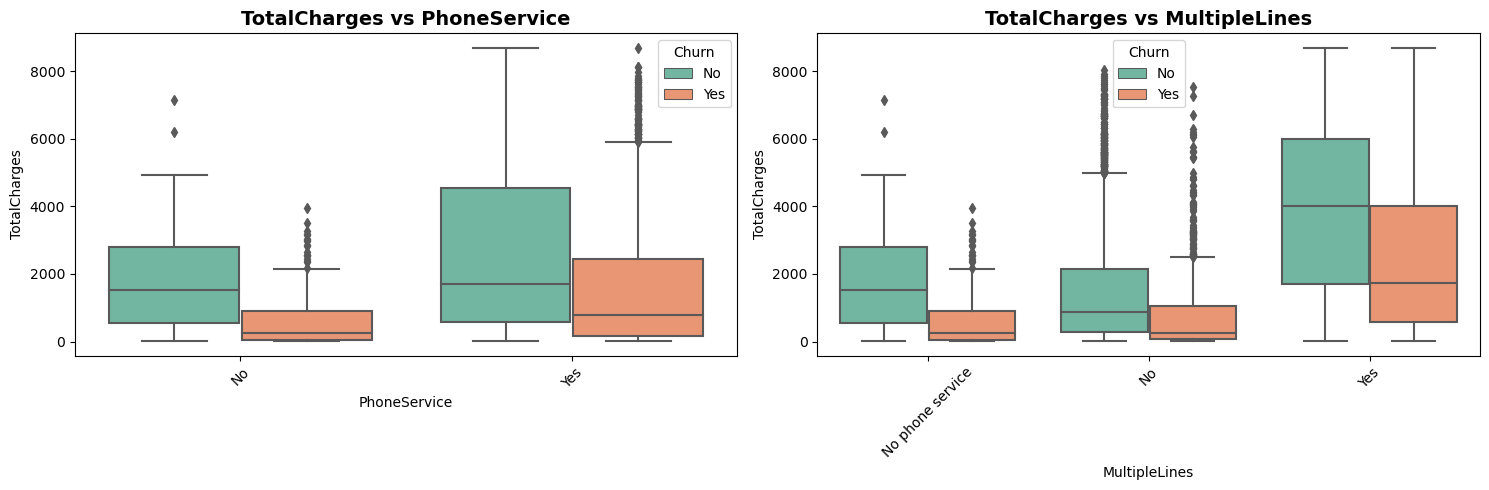

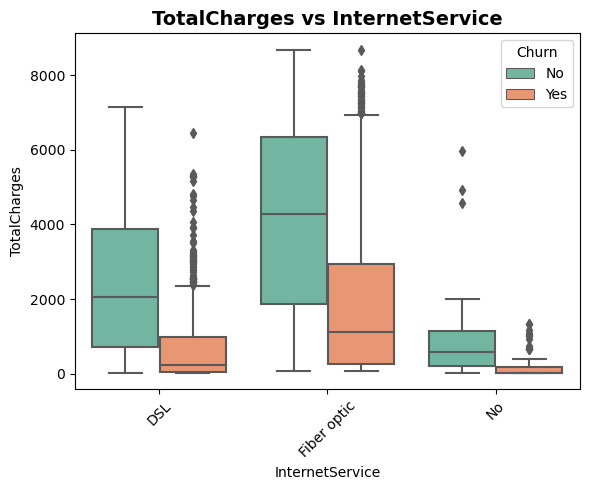

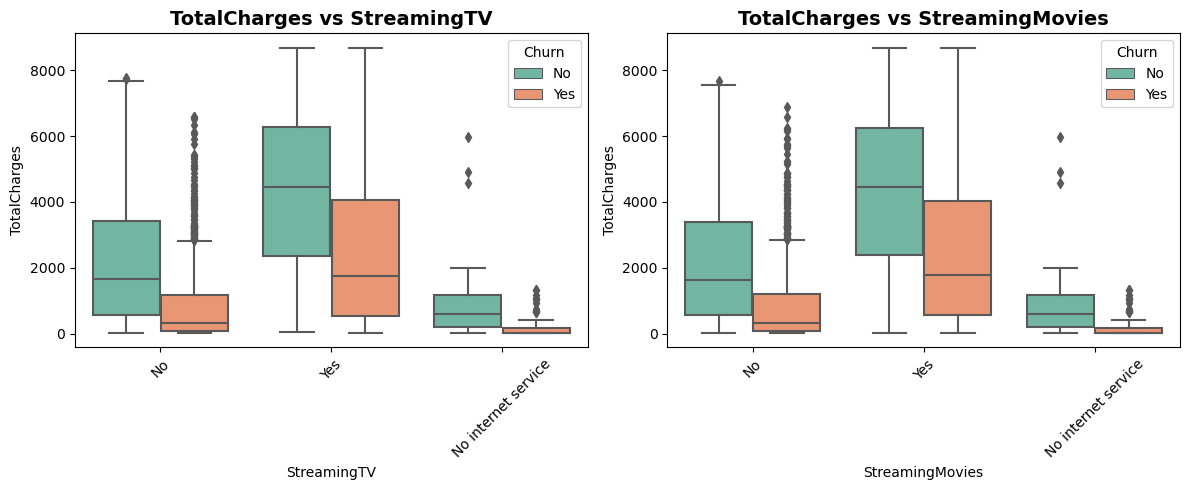

In [51]:
# TotalCharges vs Group 2: Services Subscribed by the Customer : PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies |

# Example: A sharp, visually appealing color palette
colors = sns.color_palette("Set2")  # or "Set1", "Paired", "tab10"

# Plot first two boxplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
for i, col in enumerate(l2[0:2]):
    sns.boxplot(x=col, y='TotalCharges', data=data, hue='Churn', palette=colors, ax=axes[i])
    axes[i].set_title(f'TotalCharges vs {col}', fontsize=14, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()

# Plot the third boxplot
fig, ax = plt.subplots(figsize=(6,5))
sns.boxplot(x=l2[2], y='TotalCharges', data=data, hue='Churn', palette=colors, ax=ax)
ax.set_title(f'TotalCharges vs {l2[2]}', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()

# Plot the last two boxplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
for i, col in enumerate(l2[3:5]):
    sns.boxplot(x=col, y='TotalCharges', data=data, hue='Churn', palette=colors, ax=axes[i])
    axes[i].set_title(f'TotalCharges vs {col}', fontsize=14, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()

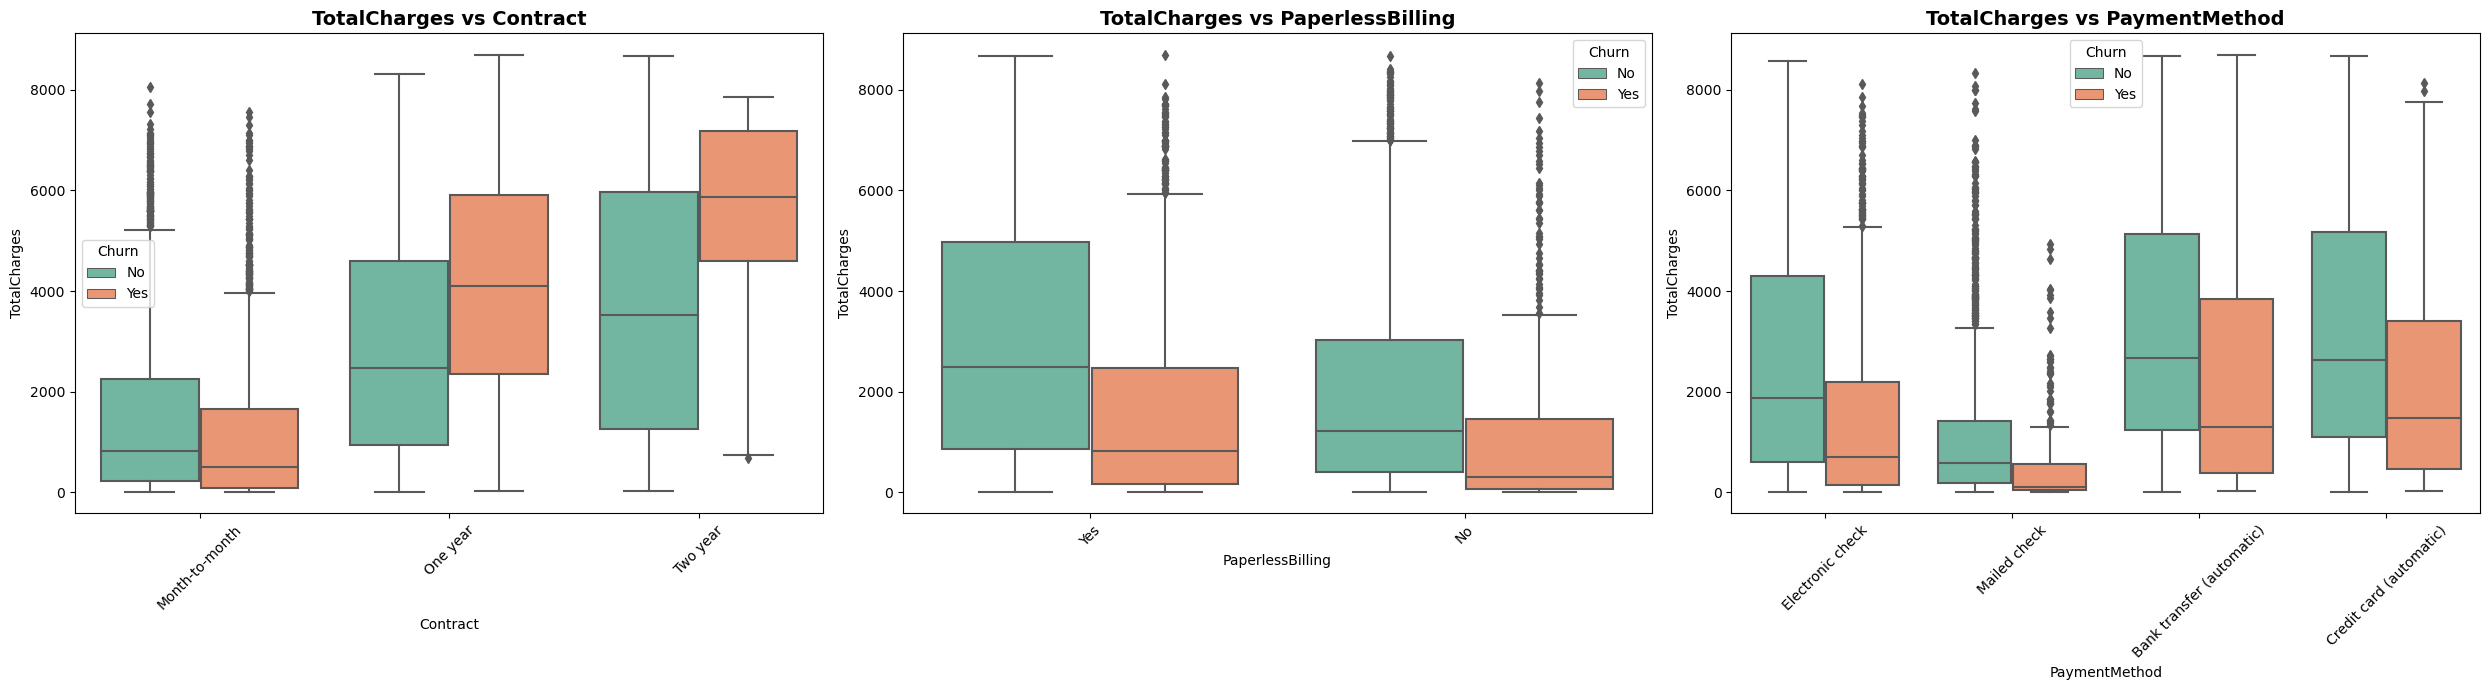

In [52]:
# TotalCharges vs Group 3 : Contract | PaperlessBilling | PaymentMethod |

# Use a consistent color palette for all plots
colors = sns.color_palette("Set2")  # same color for all plots

# Create a single figure with 3 subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,7))

for i, col in enumerate(l3):
    sns.boxplot(x=col, y='TotalCharges', data=data, hue='Churn', palette=colors, ax=axes[i])
    axes[i].set_title(f'TotalCharges vs {col}', fontsize=14, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

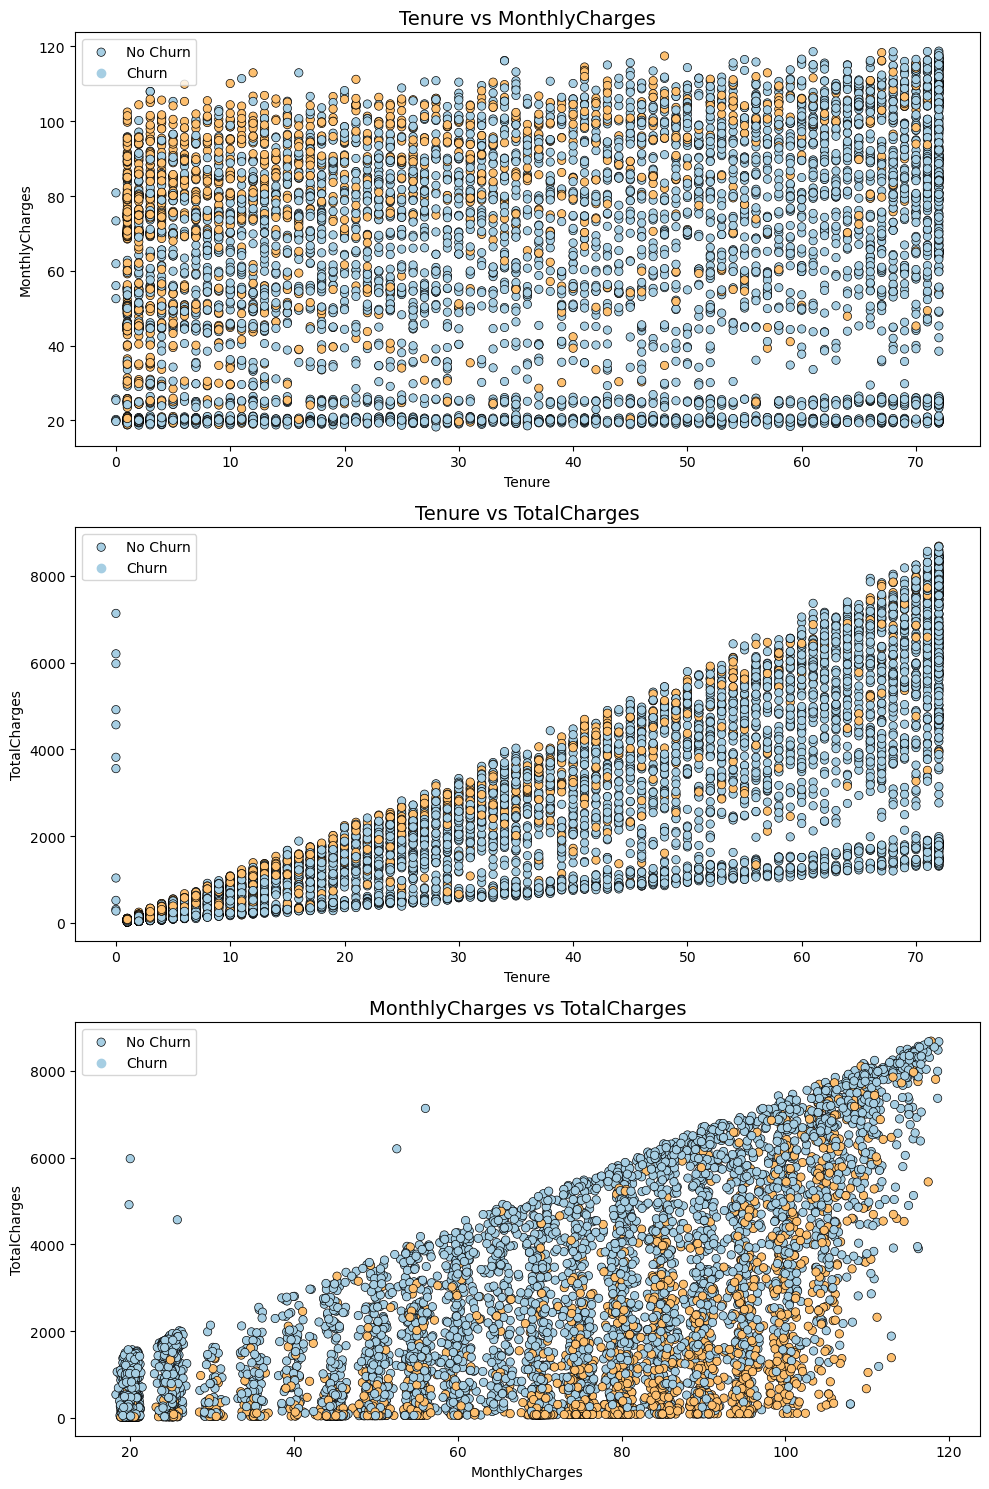

In [53]:
# Numerical features vs Numerical features w.r.t Target variable (Churn)

# Define a light, easy-to-identify palette
colors = ["#A6CEE3", "#FDBF6F"]  # light blue for No Churn, light orange for Churn

# Count the number of scatterplots
num_plots = 0
for i in range(len(numerical_features)):
    for j in range(i+1, len(numerical_features)):
        num_plots += 1

# Create a figure with enough subplots
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(10, 5*num_plots))

a = 0
for i in range(len(numerical_features)):
    for j in range(i+1, len(numerical_features)):
        sns.scatterplot(
            x=numerical_features[i],
            y=numerical_features[j],
            data=df1,
            hue='Churn',
            palette=colors,
            edgecolor='black',
            ax=axes[a] if num_plots > 1 else axes
        )
        axes[a].legend(['No Churn','Churn'], loc='upper left')
        axes[a].set_title(f'{numerical_features[i]} vs {numerical_features[j]}', fontsize=14)
        a += 1

plt.tight_layout()
plt.show()

# Feature Engineering

In [54]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Tenure'] = mms.fit_transform(df1[['Tenure']])
df1['MonthlyCharges'] = mms.fit_transform(df1[['MonthlyCharges']])
df1['TotalCharges'] = mms.fit_transform(df1[['TotalCharges']])
df1.head()

Gender  SeniorCitizen  Partner  Dependents  Tenure  PhoneService  \
0       0              0        1           0    0.01             0   
1       1              0        0           0    0.47             1   
2       1              0        0           0    0.03             1   
3       1              0        0           0    0.62             0   
4       0              0        0           0    0.03             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0              1                0               0             2  ...   
1              0                0               2             0  ...   
2              0                0               2             2  ...   
3              1                0               2             0  ...   
4              0                1               0             0  ...   

   StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
0            0                0         0                 1              2   
1            0                0         1                 0              3   
2            0                0         0                 1              3   
3            0                0         1                 0              0   
4            0                0         0                 1              2   

   MonthlyCharges  TotalCharges  Churn  MonthlyCharges_Group  \
0            0.12          0.00      0                     5   
1            0.39          0.22      0                    11   
2            0.35          0.01      1                    10   
3            0.24          0.21      0                     8   
4            0.52          0.02      1                    14   

   TotalCharges_Group  
0                   0  
1                   3  
2                   0  
3                   3  
4                   0  

[5 rows x 22 columns]

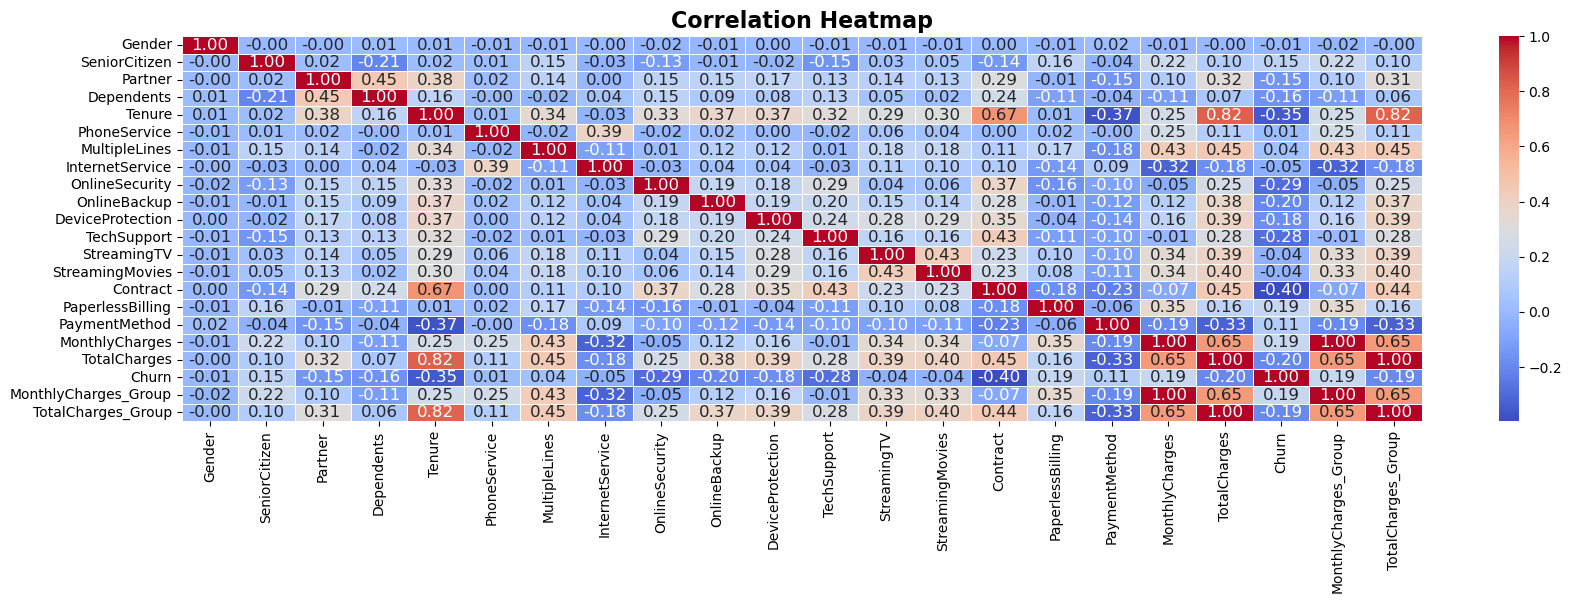

In [55]:
# Correlation Matrix

colors = sns.color_palette("coolwarm", as_cmap=True)  # blue to red gradient

plt.figure(figsize=(20,5))
sns.heatmap(
    df1.corr(),
    cmap=colors,        # light, readable gradient
    annot=True,         # show correlation values
    fmt=".2f",          # format numbers to 2 decimals
    linewidths=0.5,     # lines between cells for clarity
    cbar=True,          # show color bar
    annot_kws={"size":12}  # increase font size for readability
)
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.show()

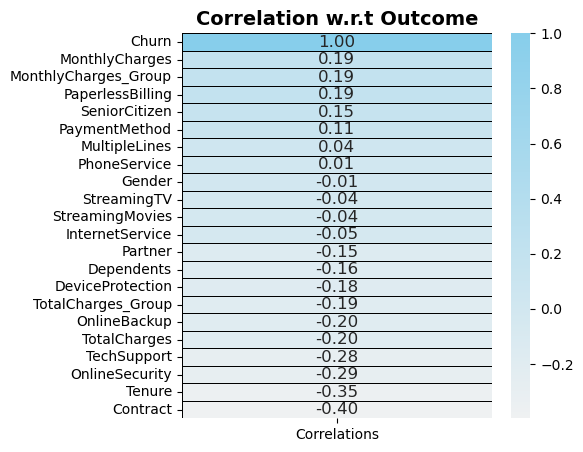

In [56]:
# Correlation only with respect to Churn

colors = sns.light_palette("skyblue", as_cmap=True)  # single light blue gradient

# Compute correlations w.r.t 'Churn'
corr = df1.corrwith(df1['Churn']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlations']

# Plot
plt.figure(figsize=(5,5))
sns.heatmap(
    corr,
    annot=True,            # show correlation values
    cmap=colors,           # light, uniform color
    linewidths=0.4,        # lines between cells
    linecolor='black',     # border color for readability
    fmt=".2f",             # format numbers
    annot_kws={"size":12}  # annotation font size
)
plt.title('Correlation w.r.t Outcome', fontsize=14, fontweight='bold')
plt.show()


In [57]:
# Feature Selection for Categorical Features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif

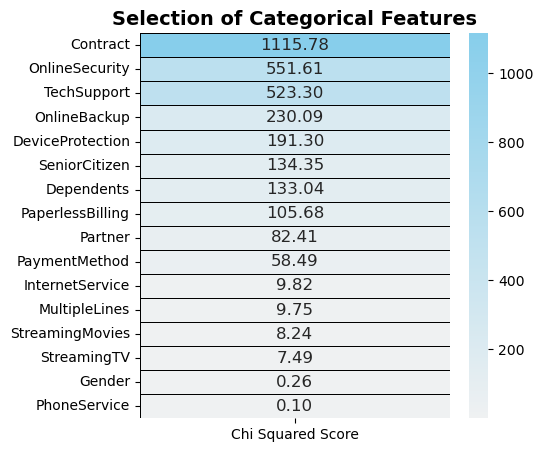

In [58]:
colors = sns.light_palette("skyblue", as_cmap=True)

# Select features
features = df1[categorical_features]
target = df1['Churn']

# Apply Chi-Squared test
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target)

# Create DataFrame of feature scores
featureScores = pd.DataFrame(
    data=fit.scores_,
    index=features.columns,
    columns=['Chi Squared Score']
)

# Plot heatmap
plt.figure(figsize=(5,5))
sns.heatmap(
    featureScores.sort_values(by='Chi Squared Score', ascending=False),
    annot=True,
    cmap=colors,            # same light color pattern
    linewidths=0.4,
    linecolor='black',
    fmt='.2f',
    annot_kws={"size":12}   # font size for readability
)
plt.title('Selection of Categorical Features', fontsize=14, fontweight='bold')
plt.show()

In [59]:
from sklearn.feature_selection import f_classif

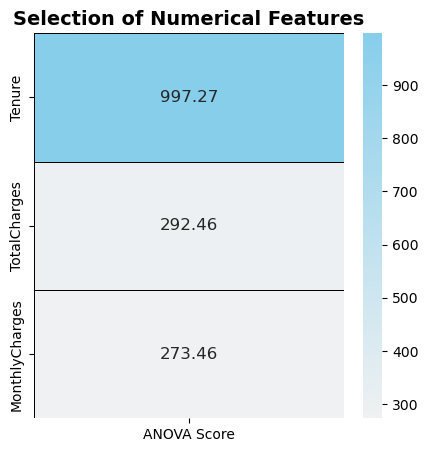

In [60]:
colors = sns.light_palette("skyblue", as_cmap=True)

# Select numerical features
features = df1[numerical_features]
target = df1['Churn']

# Apply ANOVA F-test
best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)

# Create DataFrame of feature scores
featureScores = pd.DataFrame(
    data=fit.scores_,
    index=features.columns,
    columns=['ANOVA Score']
)

# Plot heatmap
plt.figure(figsize=(5,5))
sns.heatmap(
    featureScores.sort_values(by='ANOVA Score', ascending=False),
    annot=True,
    cmap=colors,            # same light color pattern
    linewidths=0.4,
    linecolor='black',
    fmt='.2f',
    annot_kws={"size":12}   # font size for readability
)
plt.title('Selection of Numerical Features', fontsize=14, fontweight='bold')
plt.show()

In [61]:
df1.drop(columns = ['PhoneService', 'Gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'],inplace = True)
df1.head()

SeniorCitizen  Partner  Dependents  Tenure  OnlineSecurity  OnlineBackup  \
0              0        1           0    0.01               0             2   
1              0        0           0    0.47               2             0   
2              0        0           0    0.03               2             2   
3              0        0           0    0.62               2             0   
4              0        0           0    0.03               0             0   

   DeviceProtection  TechSupport  Contract  PaperlessBilling  PaymentMethod  \
0                 0            0         0                 1              2   
1                 2            0         1                 0              3   
2                 0            0         0                 1              3   
3                 2            2         1                 0              0   
4                 0            0         0                 1              2   

   MonthlyCharges  TotalCharges  Churn  MonthlyCharges_Group  \
0            0.12          0.00      0                     5   
1            0.39          0.22      0                    11   
2            0.35          0.01      1                    10   
3            0.24          0.21      0                     8   
4            0.52          0.02      1                    14   

   TotalCharges_Group  
0                   0  
1                   3  
2                   0  
3                   3  
4                   0

# Data Balancing using SMOTE

In [62]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [63]:
over = SMOTE(sampling_strategy = 1)

f1 = df1.iloc[:,:13].values
t1 = df1.iloc[:,13].values

f1, t1 = over.fit_resample(f1, t1)
Counter(t1)

Counter({0: 5174, 1: 5174})

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [65]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, plot_roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [66]:
# Modeling

Model: LogisticRegression
Cross Validation Score :  84.73%
ROC_AUC Score :  77.51%


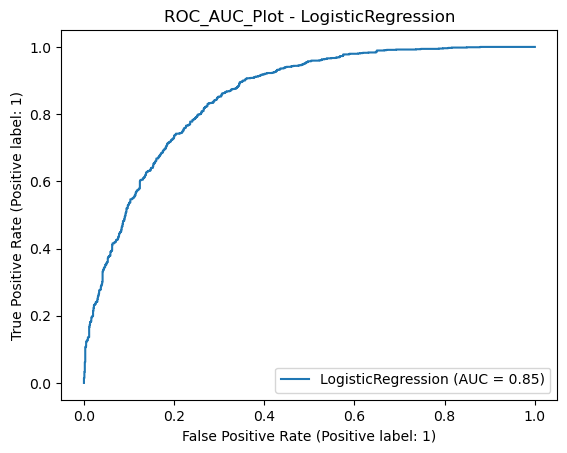

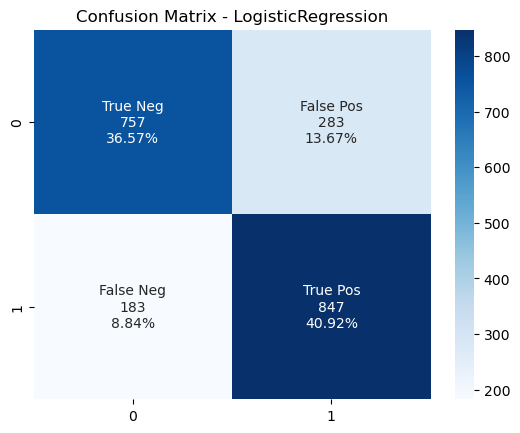

              precision    recall  f1-score   support

           0       0.81      0.73      0.76      1040
           1       0.75      0.82      0.78      1030

    accuracy                           0.77      2070
   macro avg       0.78      0.78      0.77      2070
weighted avg       0.78      0.77      0.77      2070

Model: RandomForestClassifier
Cross Validation Score :  86.23%
ROC_AUC Score :  79.70%


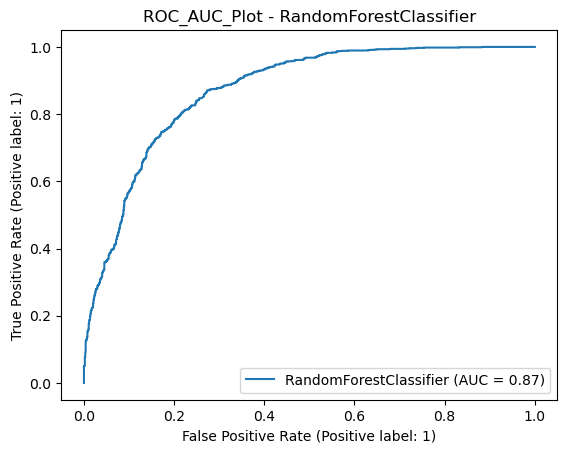

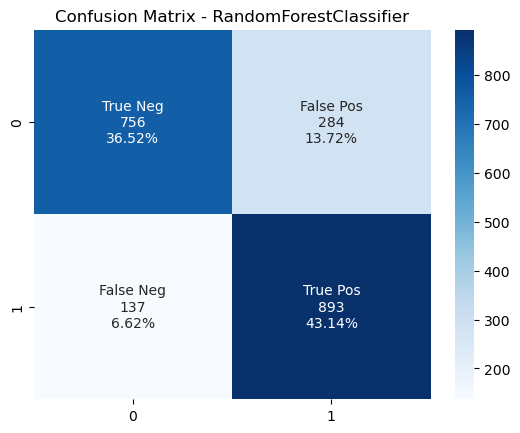

              precision    recall  f1-score   support

           0       0.85      0.73      0.78      1040
           1       0.76      0.87      0.81      1030

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070

Model: DecisionTreeClassifier
Cross Validation Score :  85.08%
ROC_AUC Score :  77.83%


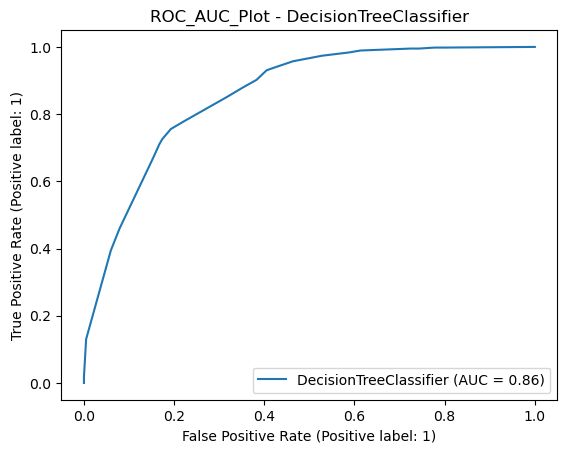

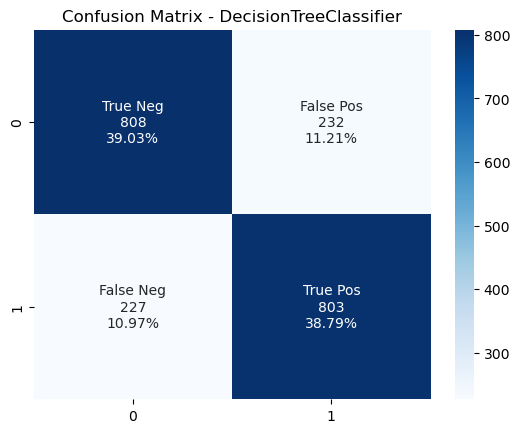

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1040
           1       0.78      0.78      0.78      1030

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070

Model: SVC
Cross Validation Score :  84.62%
ROC_AUC Score :  77.85%


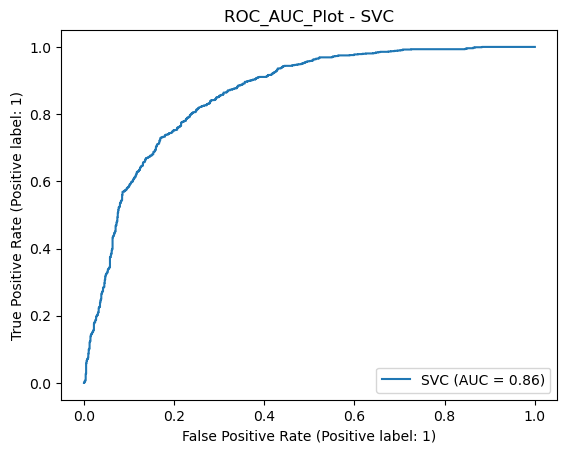

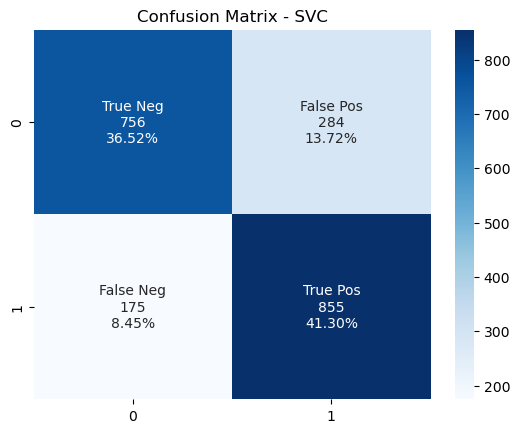

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1040
           1       0.75      0.83      0.79      1030

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070

Model: MLPClassifier
Cross Validation Score :  86.80%
ROC_AUC Score :  80.22%


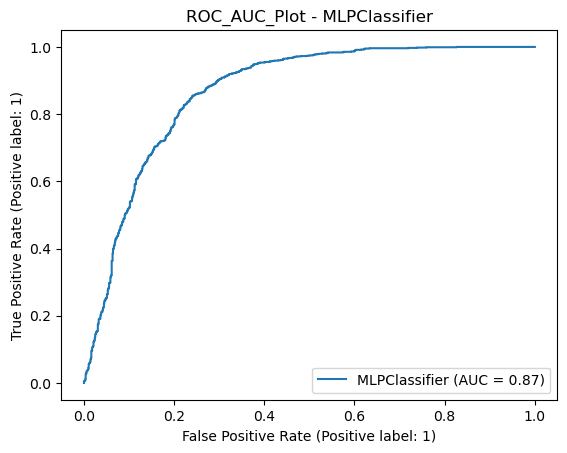

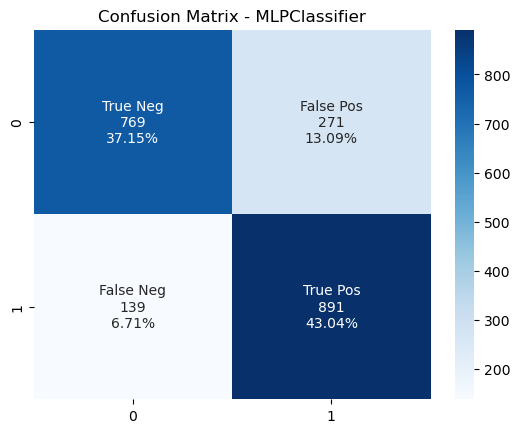

              precision    recall  f1-score   support

           0       0.85      0.74      0.79      1040
           1       0.77      0.87      0.81      1030

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.81      0.80      0.80      2070

Linear Regression R^2 Score: 0.3652971377008277


In [67]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size=0.2, random_state=2)

# Function for model training, ROC_AUC, and CV
def model(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    print(f"Model: {classifier.__class__.__name__}")
    print("Cross Validation Score : ",'{0:.2%}'.format(
        cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test, prediction)))
    
    plot_roc_curve(classifier, x_test, y_test)
    plt.title(f'ROC_AUC_Plot - {classifier.__class__.__name__}')
    plt.show()

# Function for confusion matrix and classification report
def model_evaluation(classifier, x_test, y_test):
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1,v2,v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')
    plt.title(f'Confusion Matrix - {classifier.__class__.__name__}')
    plt.show()
    
    print(classification_report(y_test, classifier.predict(x_test)))

# List of classifiers
classifiers = [
    LogisticRegression(max_iter=1000, random_state=2),
    RandomForestClassifier(n_estimators=500, max_depth=5, random_state=2),
    DecisionTreeClassifier(max_depth=5, random_state=2),
    SVC(kernel='rbf', probability=True, random_state=2),
    MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1000, random_state=2)
]

# Run models
for clf in classifiers:
    model(clf, x_train, y_train, x_test, y_test)
    model_evaluation(clf, x_test, y_test)

# Linear Regression (for regression target only, not Churn)
linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)
print("Linear Regression R^2 Score:", linreg.score(x_test, y_test))

In [68]:
from sklearn.metrics import roc_auc_score, f1_score, classification_report, confusion_matrix, plot_roc_curve


In [69]:
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, f1_score, classification_report, confusion_matrix, plot_roc_curve

In [70]:
# Prepare results
results = []
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=2)),
    ('Random Forest', RandomForestClassifier(n_estimators=500, max_depth=5, random_state=2)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=5, random_state=2)),
    ('SVM', SVC(kernel='rbf', probability=True, random_state=2)),
    ('Neural Network', MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1000, random_state=2))
]

for i, (name, clf) in enumerate(classifiers, start=1):
    clf.fit(x_train, y_train)
    cv_score = cross_val_score(clf, x_train, y_train, cv=cv, scoring='roc_auc').mean()
    y_pred = clf.predict(x_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append([i, name, round(cv_score*100, 2), round(roc_auc*100, 2), round(f1*100, 2)])

# Create DataFrame
results_df = pd.DataFrame(results, columns=['Sr. No.', 'ML Algorithm', 'Cross Validation Score', 'ROC AUC Score', 'F1 Score (Churn)'])

# Highlight best scores
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_max]

results_df.style.apply(highlight_max, subset=['Cross Validation Score', 'ROC AUC Score', 'F1 Score (Churn)'])


In [71]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

In [72]:
# After SMOTE
over = SMOTE(sampling_strategy=1, random_state=42)

X = df1.iloc[:,:13].values
y = df1.iloc[:,13].values

X, y = over.fit_resample(X, y)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Class distribution:", Counter(y))

Shape of X: (10348, 13)
Shape of y: (10348,)
Class distribution: Counter({0: 5174, 1: 5174})


In [73]:
# Train 70%, Validation 15%, Test 15%
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)


In [74]:
models = {
    "Logistic Regression": (LogisticRegression(max_iter=1000, random_state=42), 
                            {"C":[0.01,0.1,1,10]}),

    "Random Forest": (RandomForestClassifier(random_state=42), 
                      {"n_estimators":[100,300,500], "max_depth":[3,5,10]}),

    "Decision Tree": (DecisionTreeClassifier(random_state=42), 
                      {"max_depth":[3,5,10,20]}),

    "SVM": (SVC(kernel='rbf', probability=True, random_state=42), 
            {"C":[0.1,1,10]}),

    "Neural Network": (MLPClassifier(max_iter=1000, random_state=42), 
                       {"hidden_layer_sizes":[(50,50),(100,)], "alpha":[0.0001,0.001]})
}

# -----------------------------
# 4. Train, Tune, and Evaluate
# -----------------------------
results = []
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)

for i, (name, (clf, params)) in enumerate(models.items(), start=1):
    # Grid Search with CV (on training data)
    grid = GridSearchCV(clf, params, cv=cv, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    # Best model from CV
    best_model = grid.best_estimator_
    
    # Evaluate on validation set
    y_pred = best_model.predict(X_val)
    y_prob = best_model.predict_proba(X_val)[:,1]
    
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc = roc_auc_score(y_val, y_prob)
    
    results.append([i, name, round(acc*100,2), round(prec*100,2), 
                    round(rec*100,2), round(f1*100,2), round(roc*100,2)])

# -----------------------------
# 5. Create Results Table
# -----------------------------
results_df = pd.DataFrame(results, columns=["No.", "Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"])
print(results_df)

# -----------------------------
# 6. Select Best Model & Evaluate on Test Set
# -----------------------------
best_model_name = results_df.sort_values(by="F1 Score", ascending=False).iloc[0]["Model"]
print("\nBest Model (Validation):", best_model_name)

# Retrain best model on Train+Validation and evaluate on Test
final_clf, params = models[best_model_name]
grid_final = GridSearchCV(final_clf, params, cv=cv, scoring='f1', n_jobs=-1)
grid_final.fit(np.vstack([X_train, X_val]), np.hstack([y_train, y_val]))
best_final_model = grid_final.best_estimator_

y_test_pred = best_final_model.predict(X_test)
y_test_prob = best_final_model.predict_proba(X_test)[:,1]

print("\nPerformance on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("ROC AUC:", roc_auc_score(y_test, y_test_prob))

   No.                Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
0    1  Logistic Regression     77.45      74.60   83.25     78.68    85.30
1    2        Random Forest     81.96      78.77   87.50     82.91    89.30
2    3        Decision Tree     78.54      75.85   83.76     79.61    84.54
3    4                  SVM     80.41      77.44   85.82     81.42    86.55
4    5       Neural Network     80.67      78.33   84.79     81.44    86.82

Best Model (Validation): Random Forest

Performance on Test Set:
Accuracy: 0.8229233741146169
Precision: 0.7862857142857143
Recall: 0.8865979381443299
F1 Score: 0.8334342822531798
ROC AUC: 0.902549456673168


In [75]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


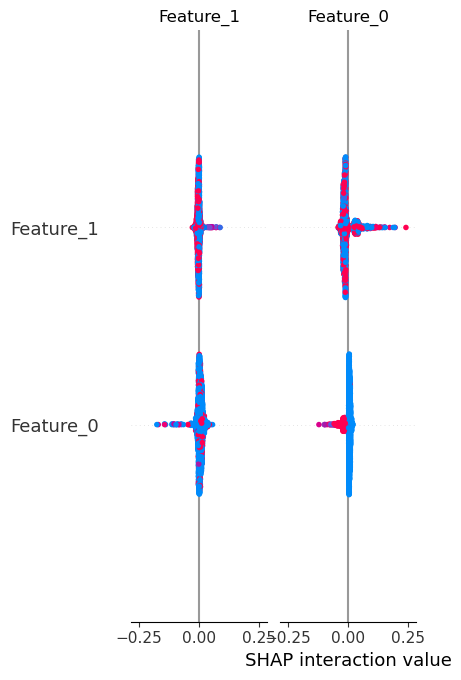

In [94]:
# Ensure correct feature names
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns
else:
    feature_names = [f"Feature_{i}" for i in range(X.shape[1])]

# Create test DataFrame with matching feature names
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# SHAP for Random Forest (tree-based model)
explainer = shap.TreeExplainer(best_final_model)
shap_values = explainer.shap_values(X_test_df)

# For binary classification, pick positive class
if isinstance(shap_values, list):
    shap_to_plot = shap_values[1]
    expected_value = explainer.expected_value[1]
else:
    shap_to_plot = shap_values
    expected_value = explainer.expected_value

# Global feature importance
shap.summary_plot(shap_to_plot, X_test_df, feature_names=feature_names)

In [97]:
# Local explanation for first sample
sample_idx = 0

force_plot = shap.force_plot(
    explainer.expected_value[1],           # base value for class 1
    shap_to_plot[sample_idx, :, 1],        # SHAP values for sample, class 1
    X_test_df.iloc[sample_idx]             # feature values as Series
)

# Save interactive HTML
shap.save_html("local_explanation.html", force_plot)

In [96]:
print(type(shap_values))
print(len(shap_values))          # is it a list? how many elements?
print(np.array(shap_values).shape)

<class 'numpy.ndarray'>
1553
(1553, 13, 2)
